In [57]:
import pandas as pd
import glob
import os
import numpy as np
import pickle
import statistics
import community
import matplotlib as mlp
# mlp.use("Qt5Agg")
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

import analysis as an
import pandas as pd


import numpy as np
import seaborn as sns

from scipy import stats 
import scipy
import pprint as pp
import bct as bct

In [58]:
def zscore(col):
    col_z = (col - col.mean())/col.std(ddof=0)
    return(col_z)

In [59]:
p='/Users/gracer/Google Drive/HCP/HCP_graph/1200/'
atlas=pd.read_csv(os.path.join(p,'brains','atlas.csv'), sep=',')


In [60]:
labels = pd.read_csv('/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/mod_labels.csv', sep=',')

In [62]:
basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/'

In [63]:
# this is a dataframe
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'6_*')
submod_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/6_submod_dict_09-15-2020_03-49-48


In [65]:
# this is the graph
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'5_*')
summary_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/5_summary_dict_09-15-2020_03-49-44


In [72]:
# this is the graph
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'7_*')
subgraph_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/7_subgraph_dict_09-15-2020_03-26-20


In [75]:
part = pd.DataFrame.from_dict(summary_dict['no']['modules']['partition'], orient='index', columns = ['module'])


In [76]:
def mod_loc(group, module): 
    columns=['Index','area', 'label']
    data = []
    part = pd.DataFrame.from_dict(summary_dict[group]['modules']['partition'], orient='index', columns = ['module'])
    x = part.loc[part['module'] == module].index
    for item in x:
        data.append(labels[['Index','area', 'label']].loc[labels['Index'][item]])    
    df = pd.DataFrame(data, columns=columns)
    return(df)

In [77]:
mod_loc('no', 0)

Index            area                label
73     20         Smmouth          L_SMmouth_1
58      6  FrontoParietal  R_FrontoParietal_10
72     46          Smhand           L_SMhand_6
84      2          Visual           L_Visual_9

In [78]:
aes_dict={'no':{},
          'ov':{},
          'ob':{}}
for group, stuff in summary_dict.items():
    print(group)
    G=stuff['comm_graph']
    aes_dict[group]=an.aesthetics(G,15000,100, 'sans-serif', 'Bold', 'z_edge', (80,50), 1)

no
8
ov
9
ob
9


no
8
8
[0.4375 1.3125 2.1875 3.0625 3.9375 4.8125 5.6875 6.5625]
ov
9
9
[0.44444444 1.33333333 2.22222222 3.11111111 4.         4.88888889
 5.77777778 6.66666667 7.55555556]
ob
9
9
[0.44444444 1.33333333 2.22222222 3.11111111 4.         4.88888889
 5.77777778 6.66666667 7.55555556]


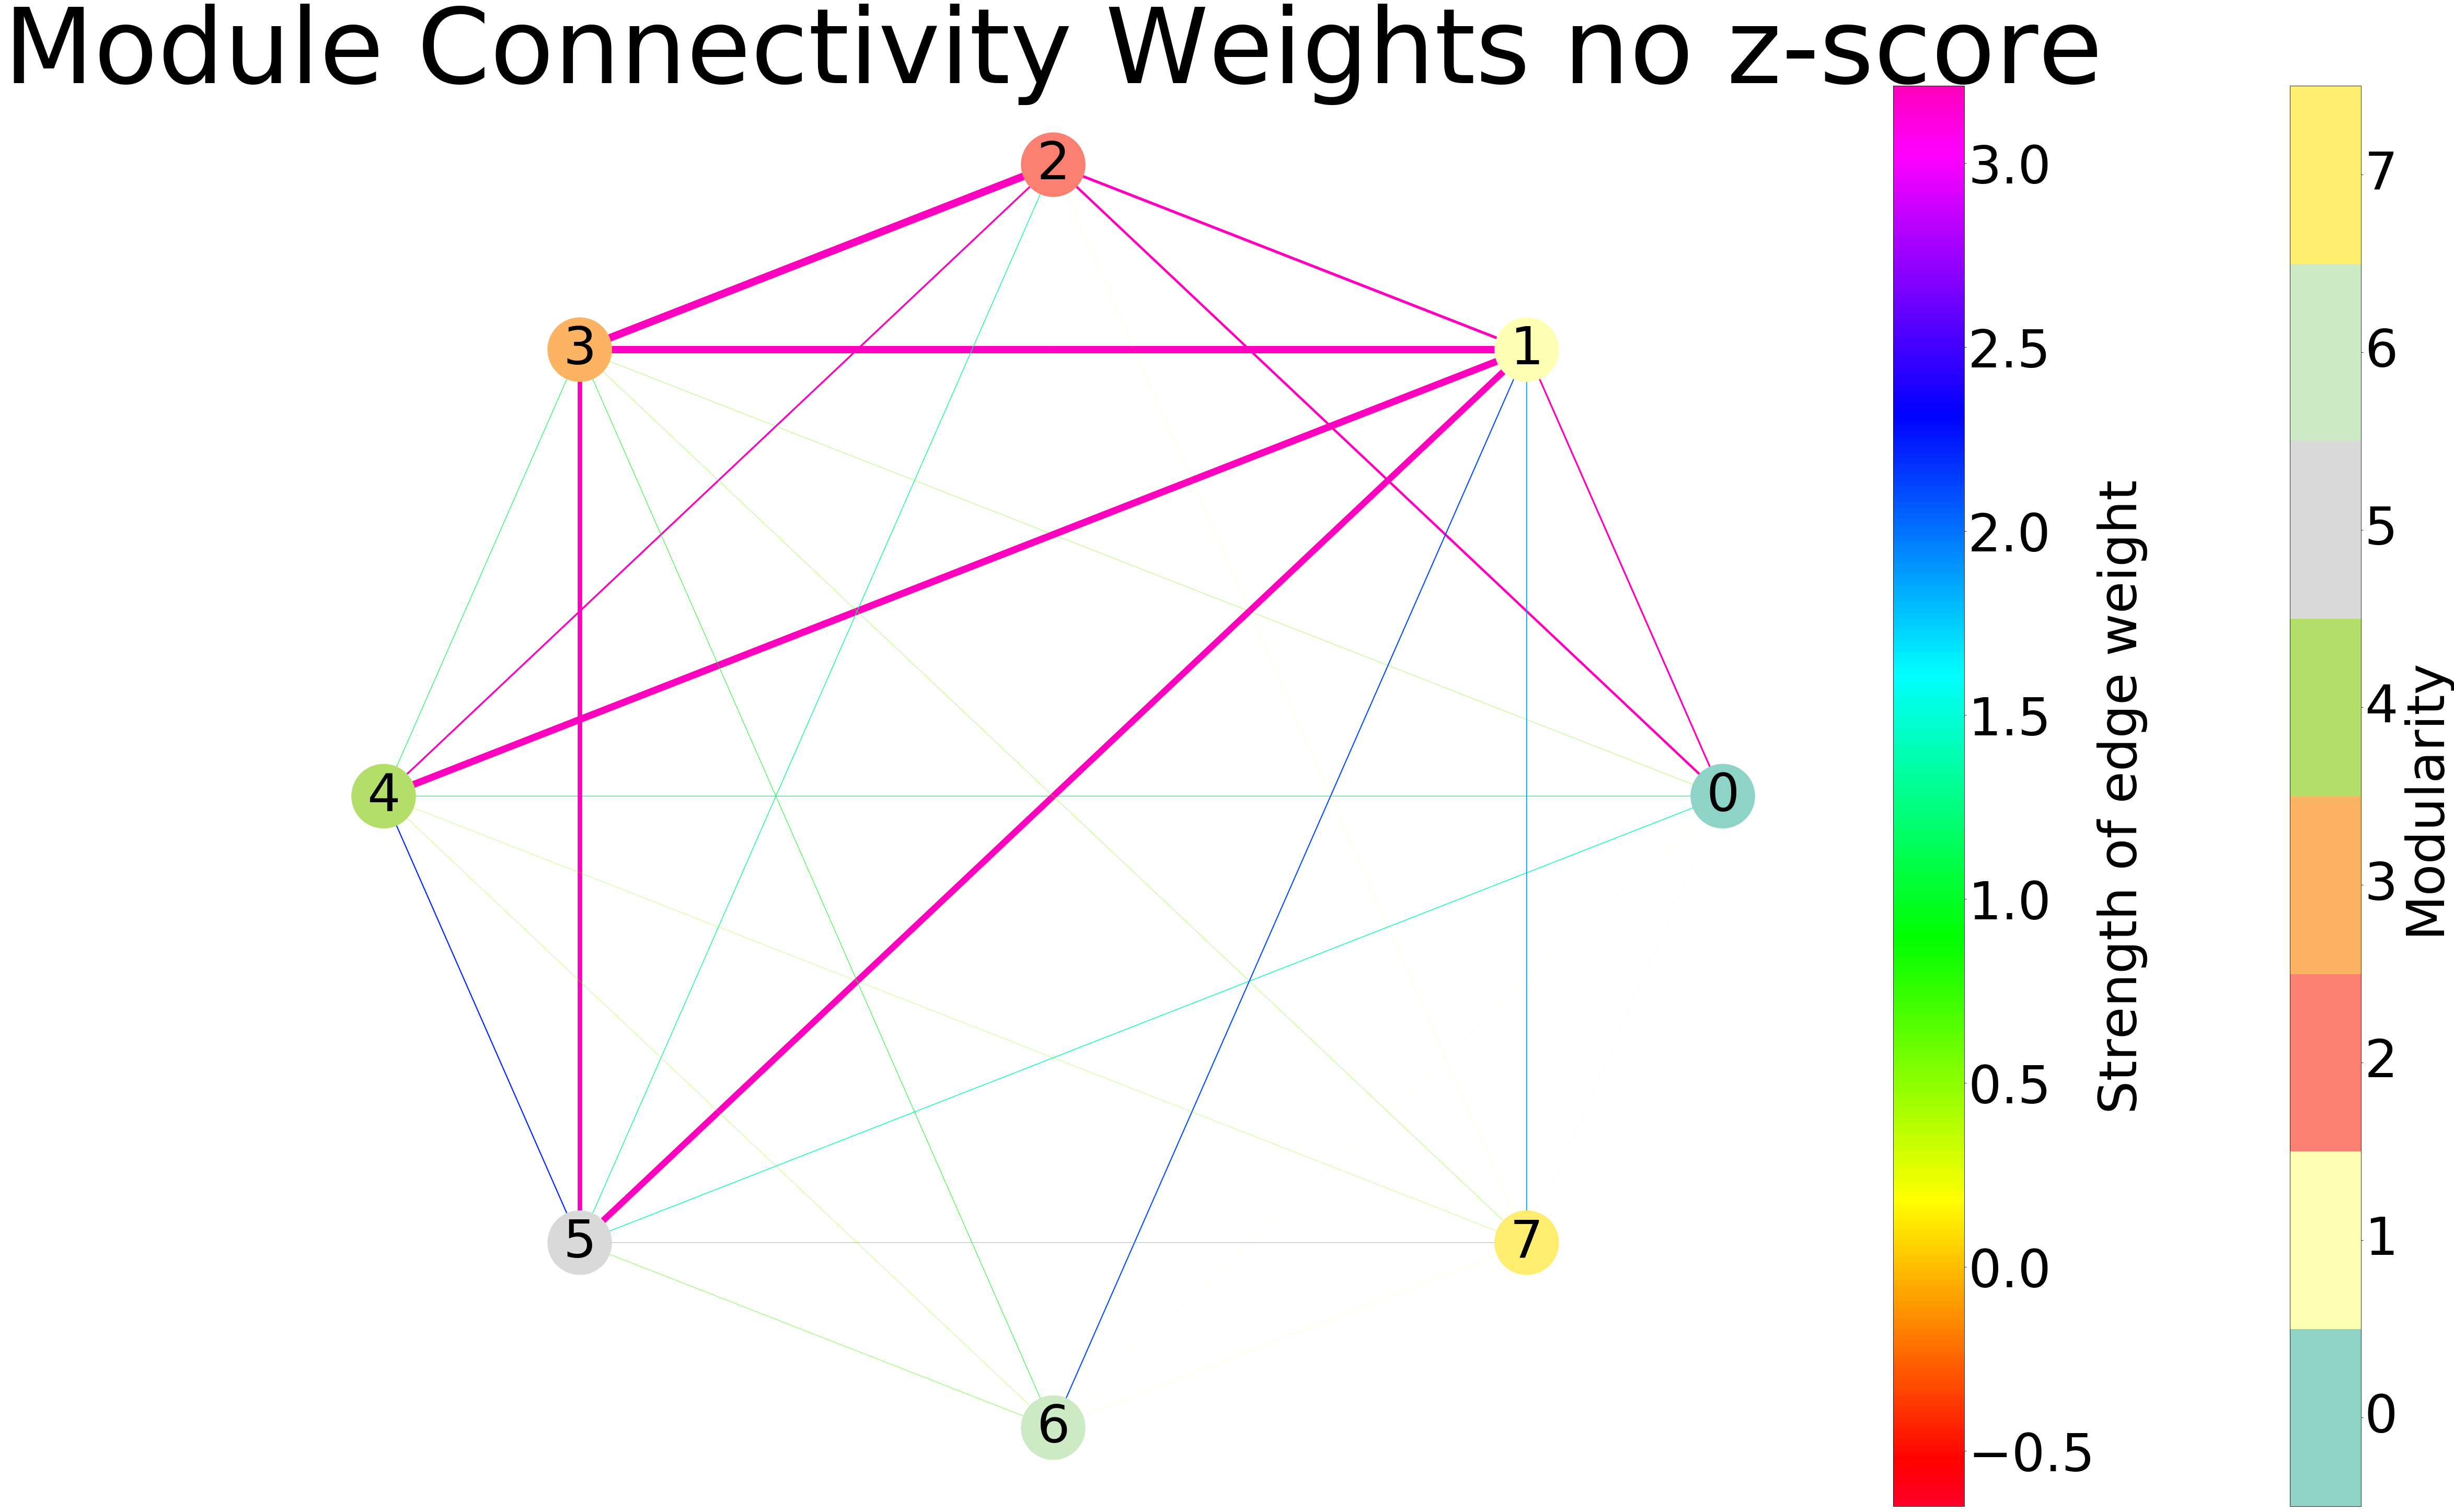

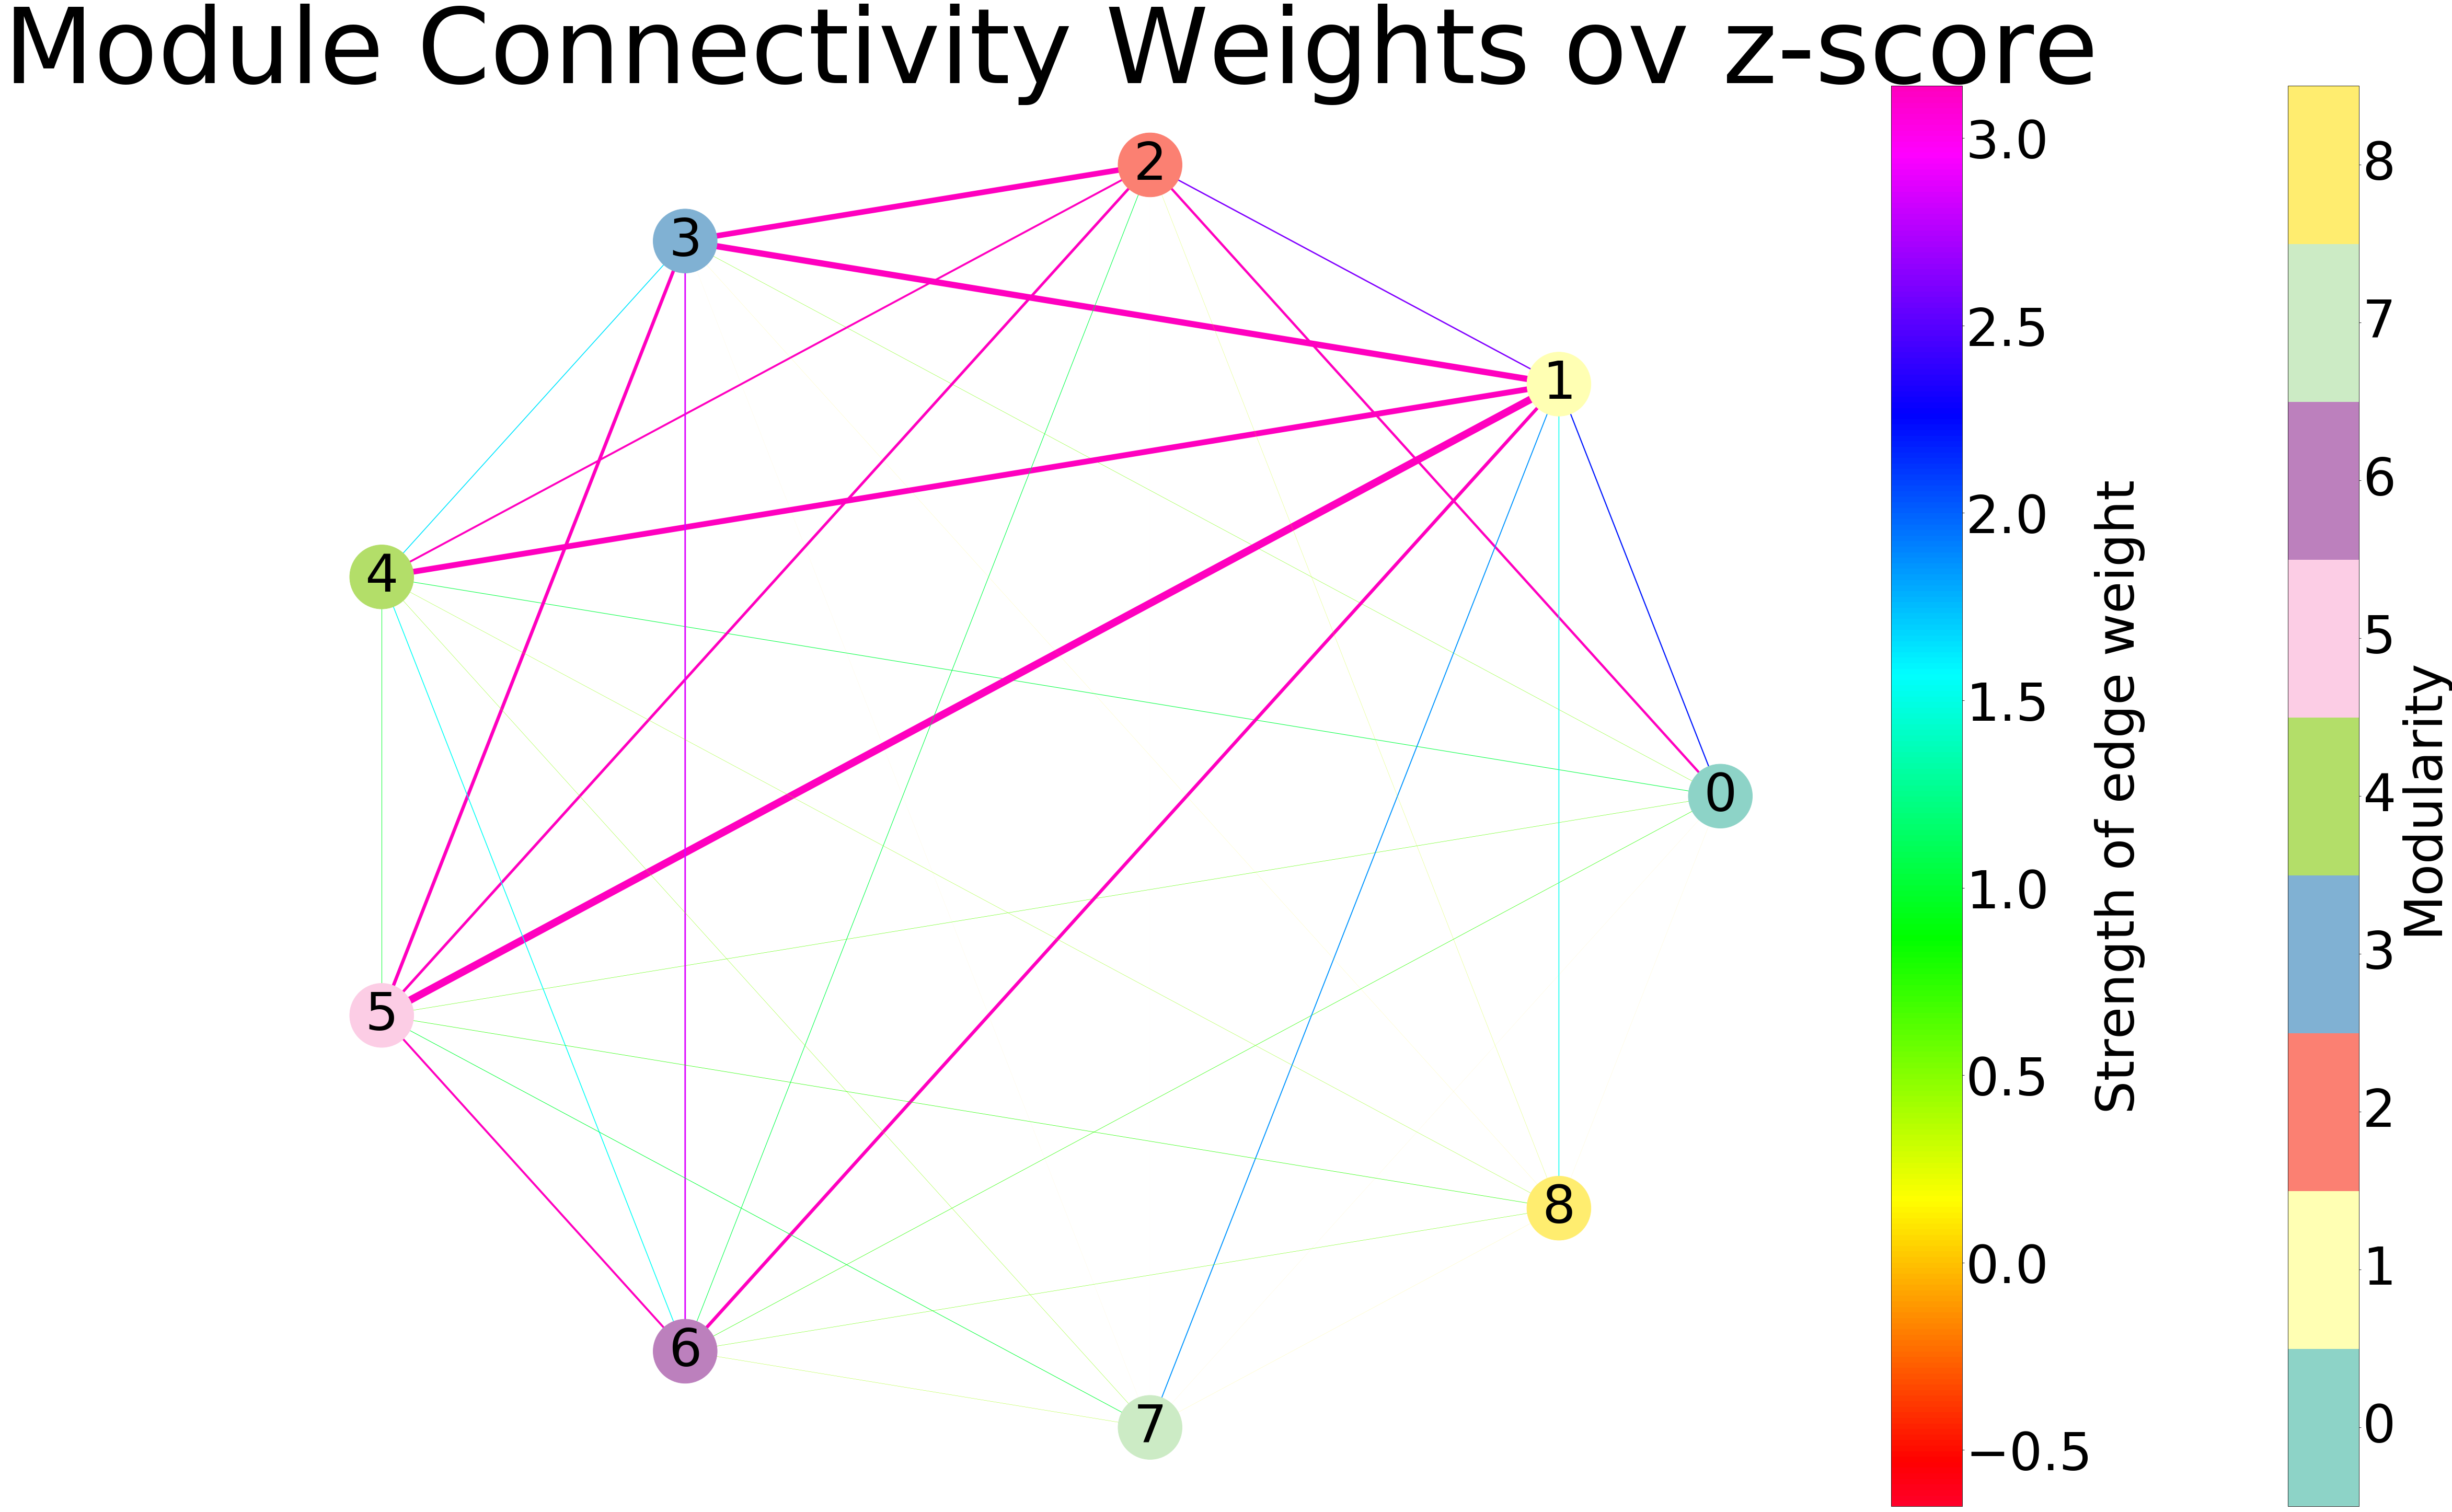

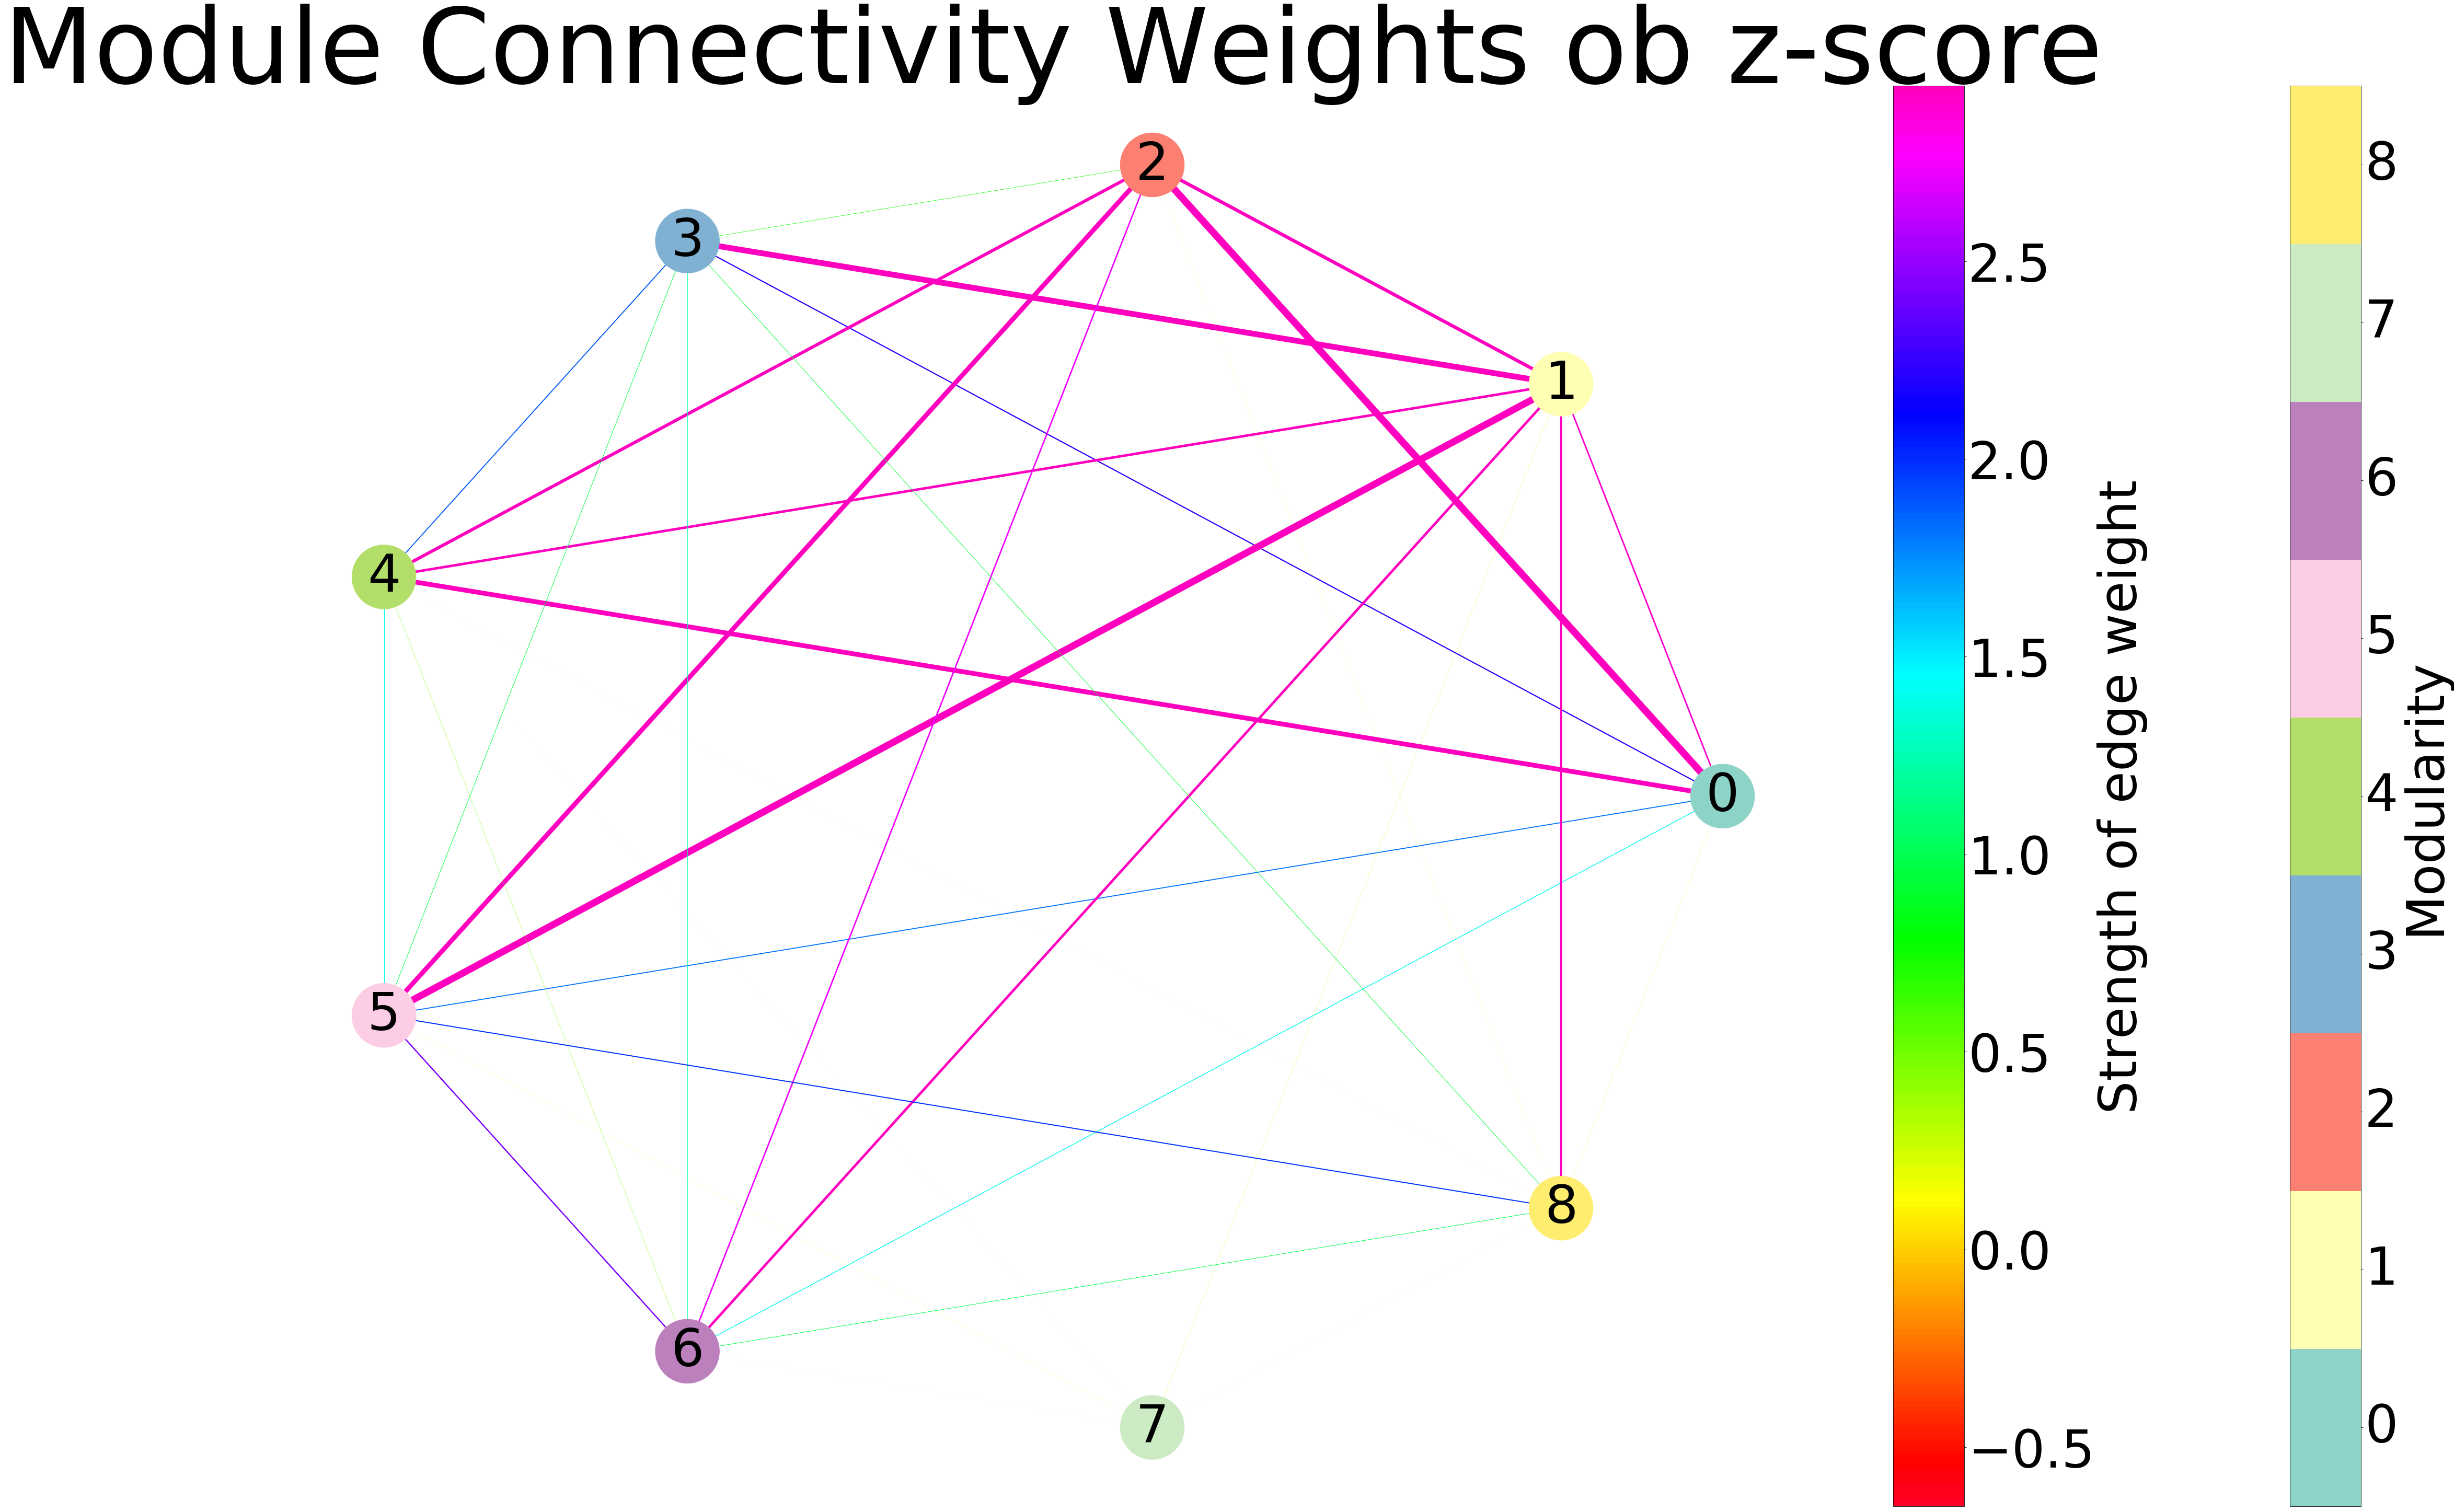

In [79]:
for key, graph in summary_dict.items():
    print(key)
    G=graph['comm_graph']
    aes=aes_dict[key]
    an.module_fig(G,'%s z-score'%key, basepath, aes)

In [88]:
groups = ['no','ov','ob']
mods = [2,4,0,5,2,6]
IC_=[11,16, 27, 35, 54, 58, 85]
for group in groups:
    for mod in mods:
        for x in IC_:
            if x in list(subgraph_dict[group][mod].nodes()):
                print('for %s in mod %i and node %i'%(group, mod, x))
                print(subgraph_dict[group][mod].nodes(data=True)[x])

for no in mod 2 and node 16
{'clustering': 0.6576576576576577, 'centrality': 0.0036364854098812865, 'PC': 0.1520033320103027, 'sub_modules': 1, 'sub_zDegree': -1.4028850798949355, 'labels': {'label': 'L_Visual_7', 'Unnamed: 2': 'L_V6_ROI', 'area': 'Visual', 'IC': 'IC_16'}}
for no in mod 2 and node 27
{'clustering': 0.7641129032258065, 'centrality': 0.0015004524117019403, 'PC': 0.15697102882420333, 'sub_modules': 1, 'sub_zDegree': -1.4028850798949355, 'labels': {'label': 'L_Visual_14', 'Unnamed: 2': 'L_V2_ROI', 'area': 'Visual', 'IC': 'IC_27'}}
for no in mod 4 and node 35
{'clustering': 0.6823529411764706, 'centrality': 0.0031559702832517776, 'PC': 0.6038352511130416, 'sub_modules': 0, 'sub_zDegree': 0.0, 'labels': {'label': 'L_Default_15', 'Unnamed: 2': 'L_9m_RO', 'area': 'Default', 'IC': 'IC_35'}}
for no in mod 2 and node 16
{'clustering': 0.6576576576576577, 'centrality': 0.0036364854098812865, 'PC': 0.1520033320103027, 'sub_modules': 1, 'sub_zDegree': -1.4028850798949355, 'labels': 

In [89]:
def aesthetics(graph, node_size, font_size, font_family, font_weight, edge_att, plot_size, mod):
    aes={'general':{},
         'nodes':{},
         'edges':{}}
    # nodes
    color = np.array(list(graph.nodes))
    color = np.array(color)
    n_color=len(list(set(color)))
    print(n_color)
    aes['nodes']['color'] = color
    aes['nodes']['colormap'] = ['Set3', n_color]
    aes['nodes']['n_color'] = n_color
    aes['nodes']['max'] = float(color.max())
    aes['nodes']['min'] = float(color.min())
    aes['nodes']['font_size'] = int(font_size)
    aes['nodes']['font_family'] = font_family
    aes['nodes']['font_weight'] = font_weight
    aes['nodes']['node_size'] = int(node_size)
    #edges
    aes['edges']['colormap'] = plt.cm.gist_rainbow
    edges,weights = zip(*nx.get_edge_attributes(graph,edge_att).items())
    weights=np.array(weights)
    aes['edges']['width mod'] = mod
    aes['edges']['min'] = weights.min()
    aes['edges']['max'] = weights.max()
    # General
    aes['general']['plot_size']=plot_size #tuple 80,50
    return(aes)

In [90]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def basic_graph(graph, scl, FONT, metric, size, tile, basepath, bmi, mod):
    #threshold
    e,w = zip(*nx.get_edge_attributes(graph, 'weight').items())
    purr=np.percentile(w, tile)
    g=an.threshold2(graph,purr)
    # style
    fig = plt.figure(figsize = size)
    ax1 = plt.subplot(111, aspect = 'equal')
    plt.subplots_adjust(left=0.25, bottom=0, right=0.75, top=1, wspace=0.2, hspace=0)

    positions=nx.circular_layout(g)
    
    # NODES
    nodes, color = zip(*nx.get_node_attributes(g, metric).items())
    nodes, label = zip(*nx.get_node_attributes(g, 'labels').items())
    nodes, size = zip(*nx.get_node_attributes(g, metric).items())
    new={}
    for x,y in nx.get_node_attributes(g, 'labels').items():
        new[x]=y['area']
    
    #draws nodes
    color = np.array(color)
    colz=stats.zscore(color)
    nColormap=plt.cm.cool 
    cM=colz.max()
    cm=colz.min()

    scale=scl/colz.max()
    nx.draw_networkx_nodes(g,
                             positions,
                             node_color=colz,
                             node_size=np.square(colz)*scale,
                             alpha=0.8,
                             cmap= nColormap,
                             vmin=cm ,vmax=cM)

    #Styling for labels
    nx.draw_networkx_labels(g, 
                            positions,
                            new,
                            font_size=FONT,
                            font_family='sans-serif',
                            fontweight = 'bold',
                            horizontalalignment = 'center',
                            verticalalignment = 'top')


    # EDGES 
    edges,weights = zip(*nx.get_edge_attributes(g, 'weight').items())
    #draw edges
    weights=np.array(weights)
    eColormap=plt.cm.gist_rainbow #check here if you want different colors https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    nx.draw_networkx_edges(g, 
                             positions,
                             edge_list=edges,
                             style='solid',
                             width = np.square(weights)*200,
                             edge_color = weights,
                             edge_cmap=eColormap,
                             edge_vmin=weights.min(),
                             edge_vmax=weights.max())
    
    #FInishing touches


    plt.axis('off')
    if bmi == 'no':
        plt.title("%s and edge weights of \n %s graph"%(metric, 'Average BMI'), fontsize = FONT)
    if bmi == 'ov':
        plt.title("%s and edge weights of \n %s graph"%(metric, 'High BMI'), fontsize = FONT)
    if bmi == 'ob':
        plt.title("%s and edge weights of \n %s graph"%(metric, 'Very high BMI'), fontsize = FONT)
    

    axins1 = inset_axes(ax1,
                    width="2.5%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='right',
                    bbox_to_anchor=(0.15, 0., 1, 1), #(x0, y0, width, height)
                    bbox_transform=ax1.transAxes,
                    borderpad=1)
    
    axins2 = inset_axes(ax1,
                    width="2.5%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='right',
                    bbox_to_anchor=(.25, 0, 1, 1),
                    bbox_transform=ax1.transAxes,
                    borderpad=1)

    sm = plt.cm.ScalarMappable(cmap=eColormap, norm=plt.Normalize(vmin = weights.min(), vmax=weights.max()))
    sm._A = []

    edge_bar=fig.colorbar(sm, cax=axins1, orientation="vertical")
    for l in edge_bar.ax.yaxis.get_ticklabels():
        l.set_size(FONT)
    edge_bar.set_label('Strength of edge weight', fontsize = FONT)
    
    sn = plt.cm.ScalarMappable(cmap=nColormap, norm=plt.Normalize(vmin = cm, vmax=cM))
    sn._A = []
    
    rgb = sn.to_rgba(x=colz)
    save={}
    i = 0
    for x,y in nx.get_node_attributes(g, 'labels').items():
        save[x]=[y['IC'], y['area'], np.round(rgb[i]*255)]
        i=i+1
    
    node_bar=fig.colorbar(sn, cax=axins2, label='Module value')
    for l in node_bar.ax.yaxis.get_ticklabels():
        l.set_size(FONT)
    node_bar.set_label('%s'%metric,fontsize = FONT)
    
    
    basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/images'
    if bmi == 'no':
        plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric, 'Average BMI', mod)), format="PNG")
    if bmi == 'ov':
        plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric, 'High BMI', mod)), format="PNG")
    if bmi == 'ob':
        plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric, 'Very high BMI', mod)), format="PNG")
    plt.show()
    return(save)


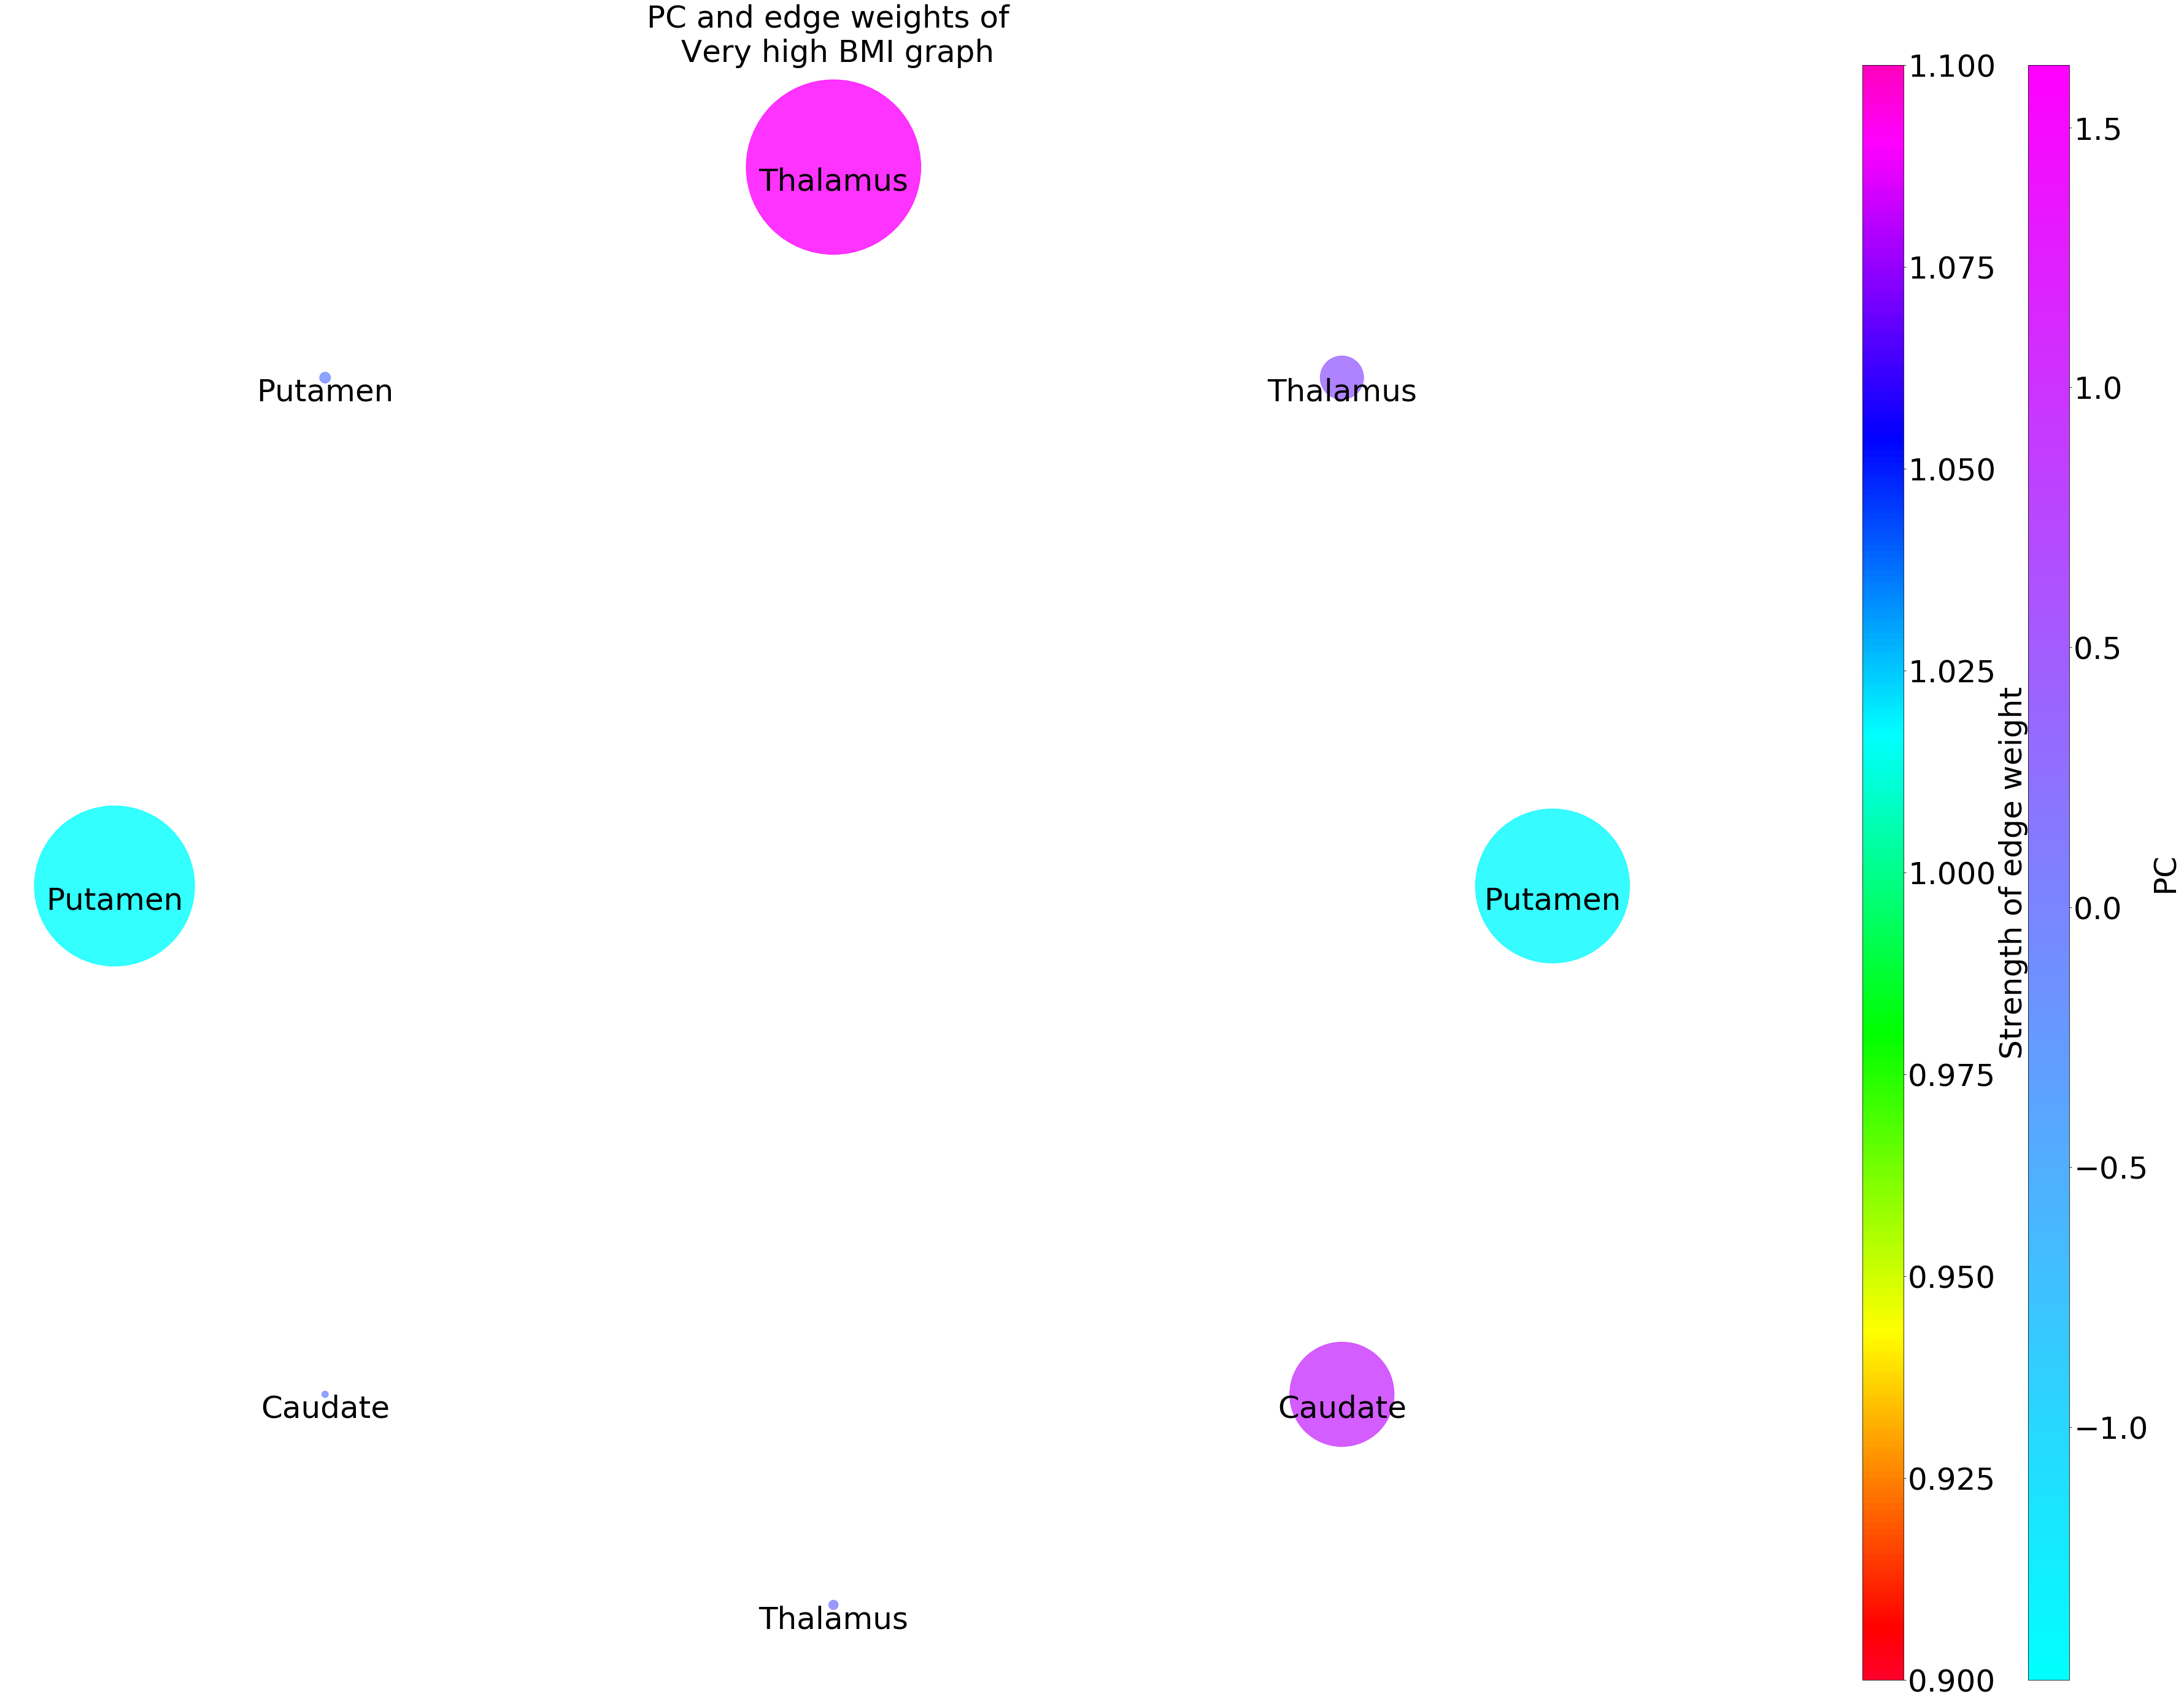

{64: ['IC_64', 'Putamen', array([  4., 251., 255., 255.])],
 96: ['IC_96', 'Thalamus', array([155., 100., 255., 255.])],
 66: ['IC_66', 'Thalamus', array([255.,   0., 255., 255.])],
 68: ['IC_68', 'Putamen', array([114., 141., 255., 255.])],
 75: ['IC_75', 'Putamen', array([  0., 255., 255., 255.])],
 78: ['IC_78', 'Caudate', array([117., 138., 255., 255.])],
 86: ['IC_86', 'Thalamus', array([129., 126., 255., 255.])],
 62: ['IC_62', 'Caudate', array([202.,  53., 255., 255.])]}

In [91]:
basic_graph(subgraph_dict[group][mod], 50000, 50, 'PC', (75,50), 80, basepath, '%s'%group, '%i'%mod)

no
2


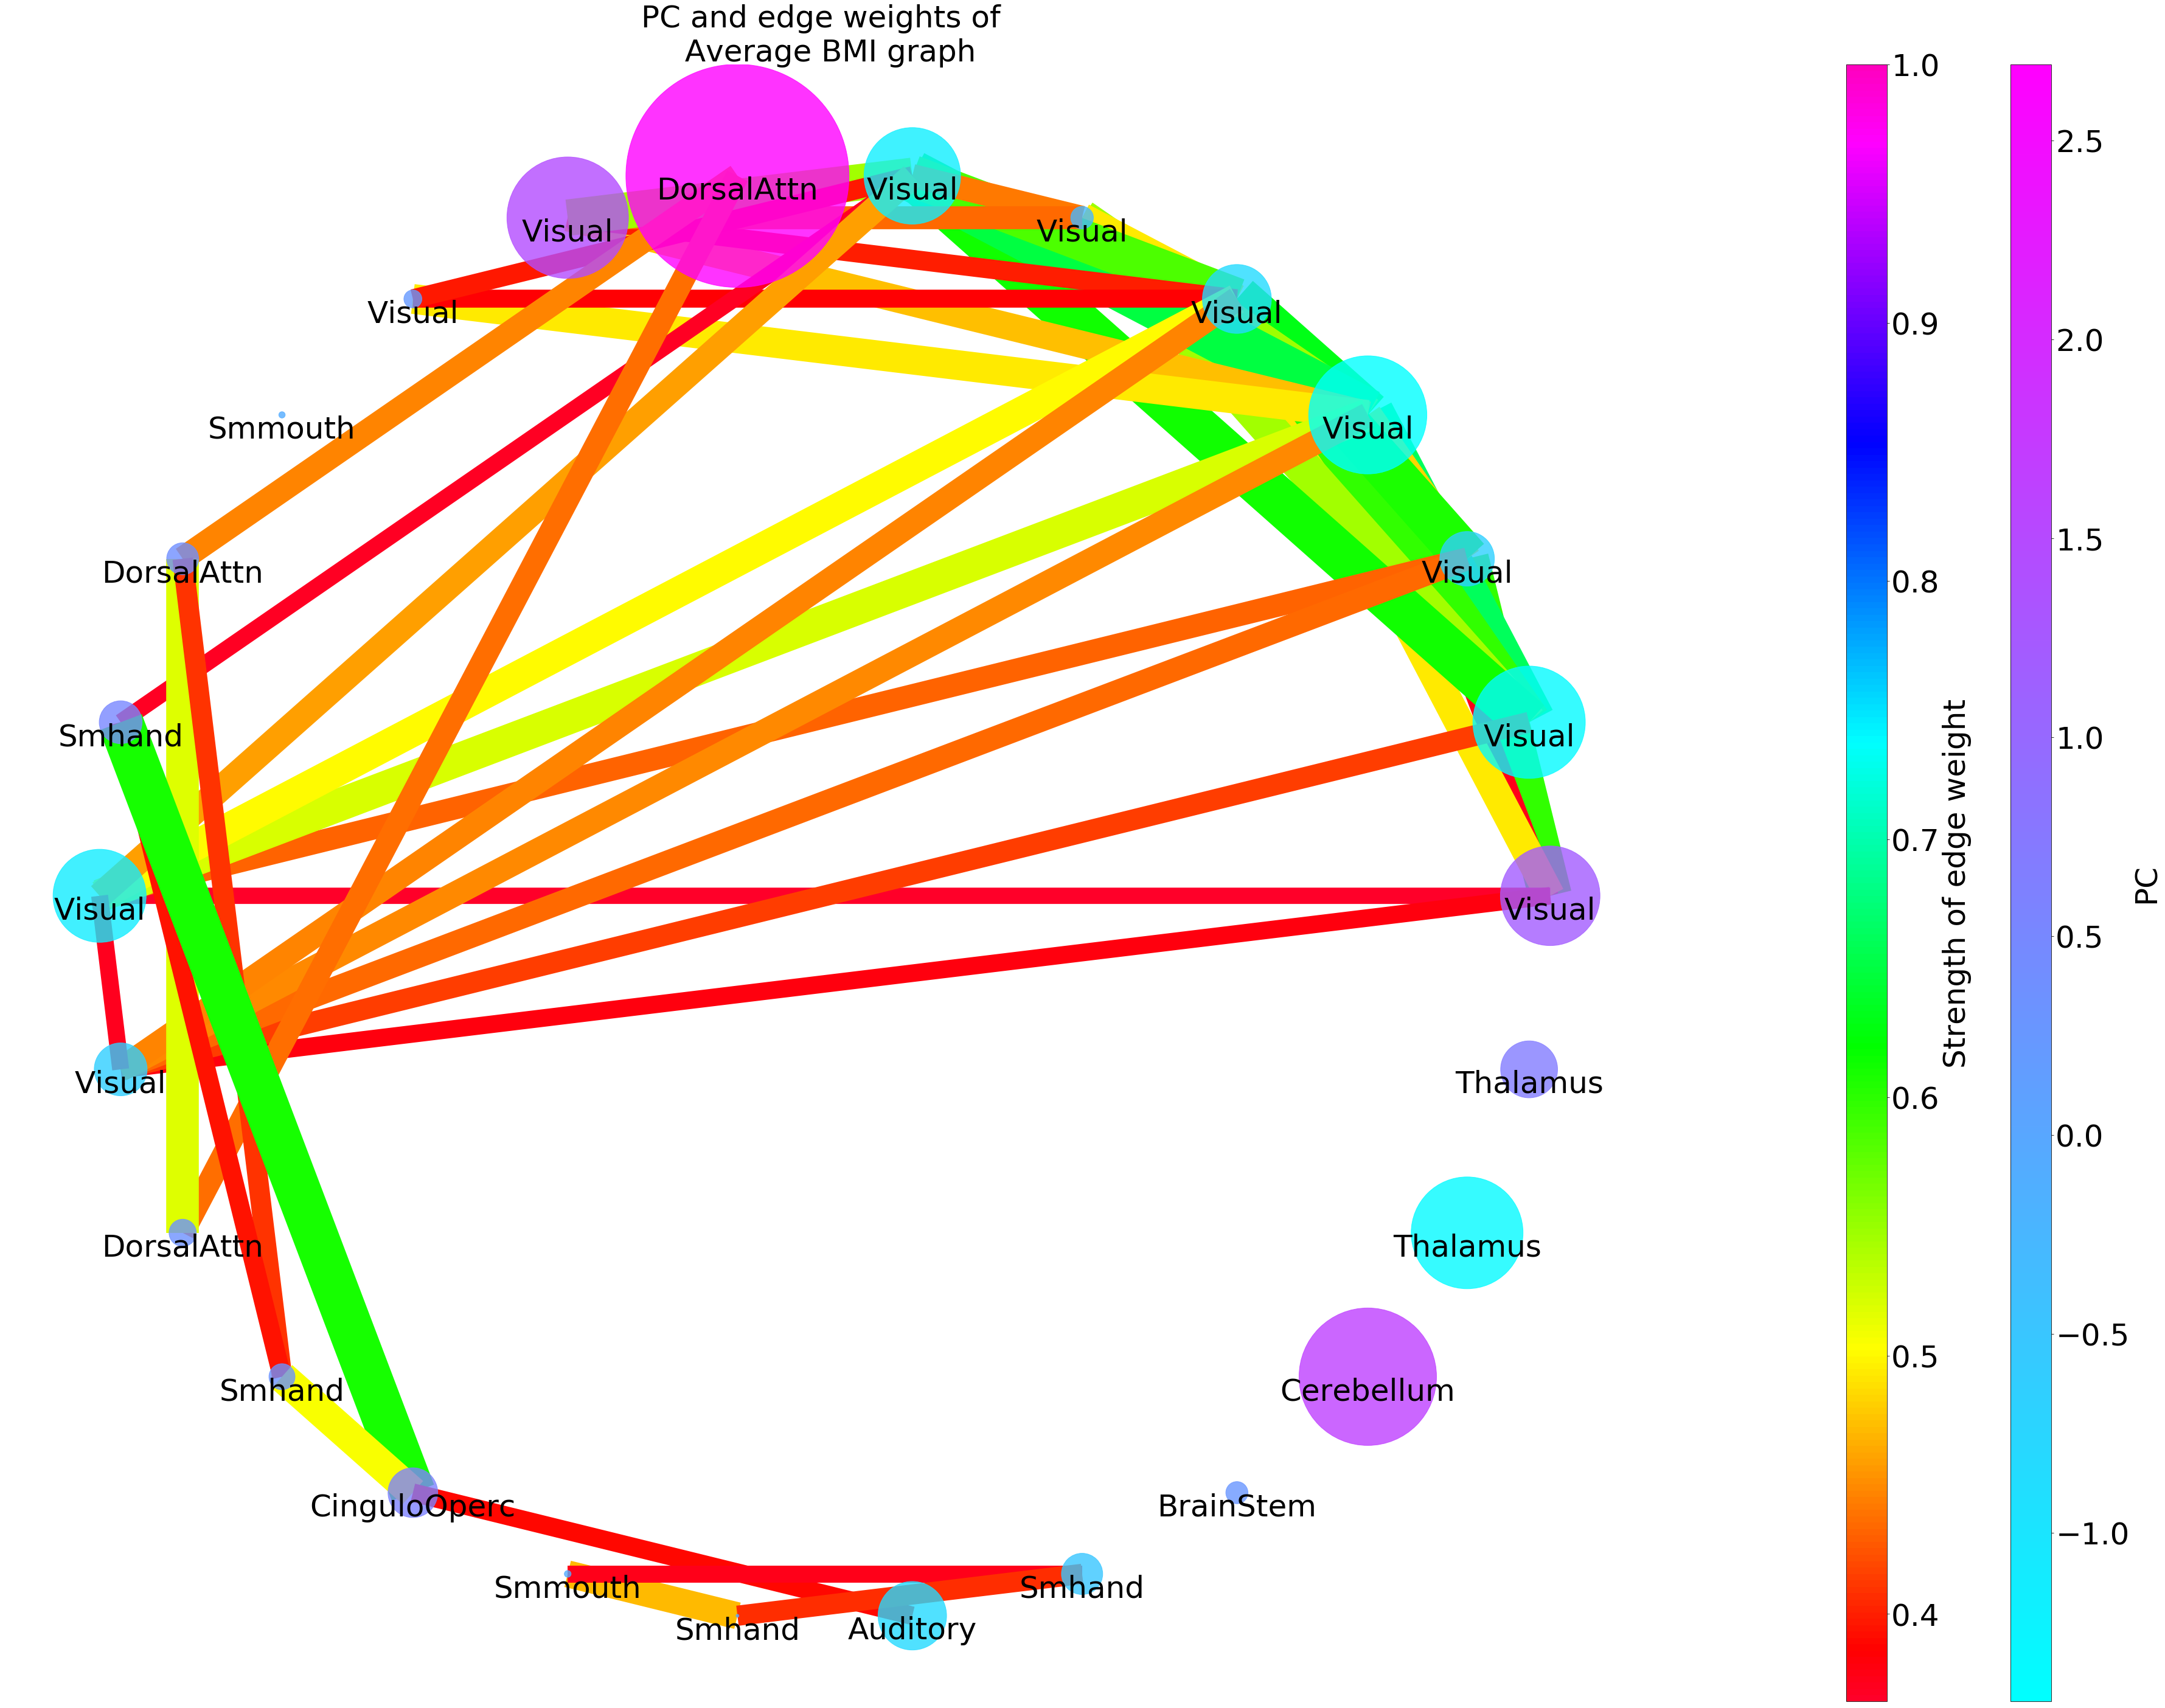

5


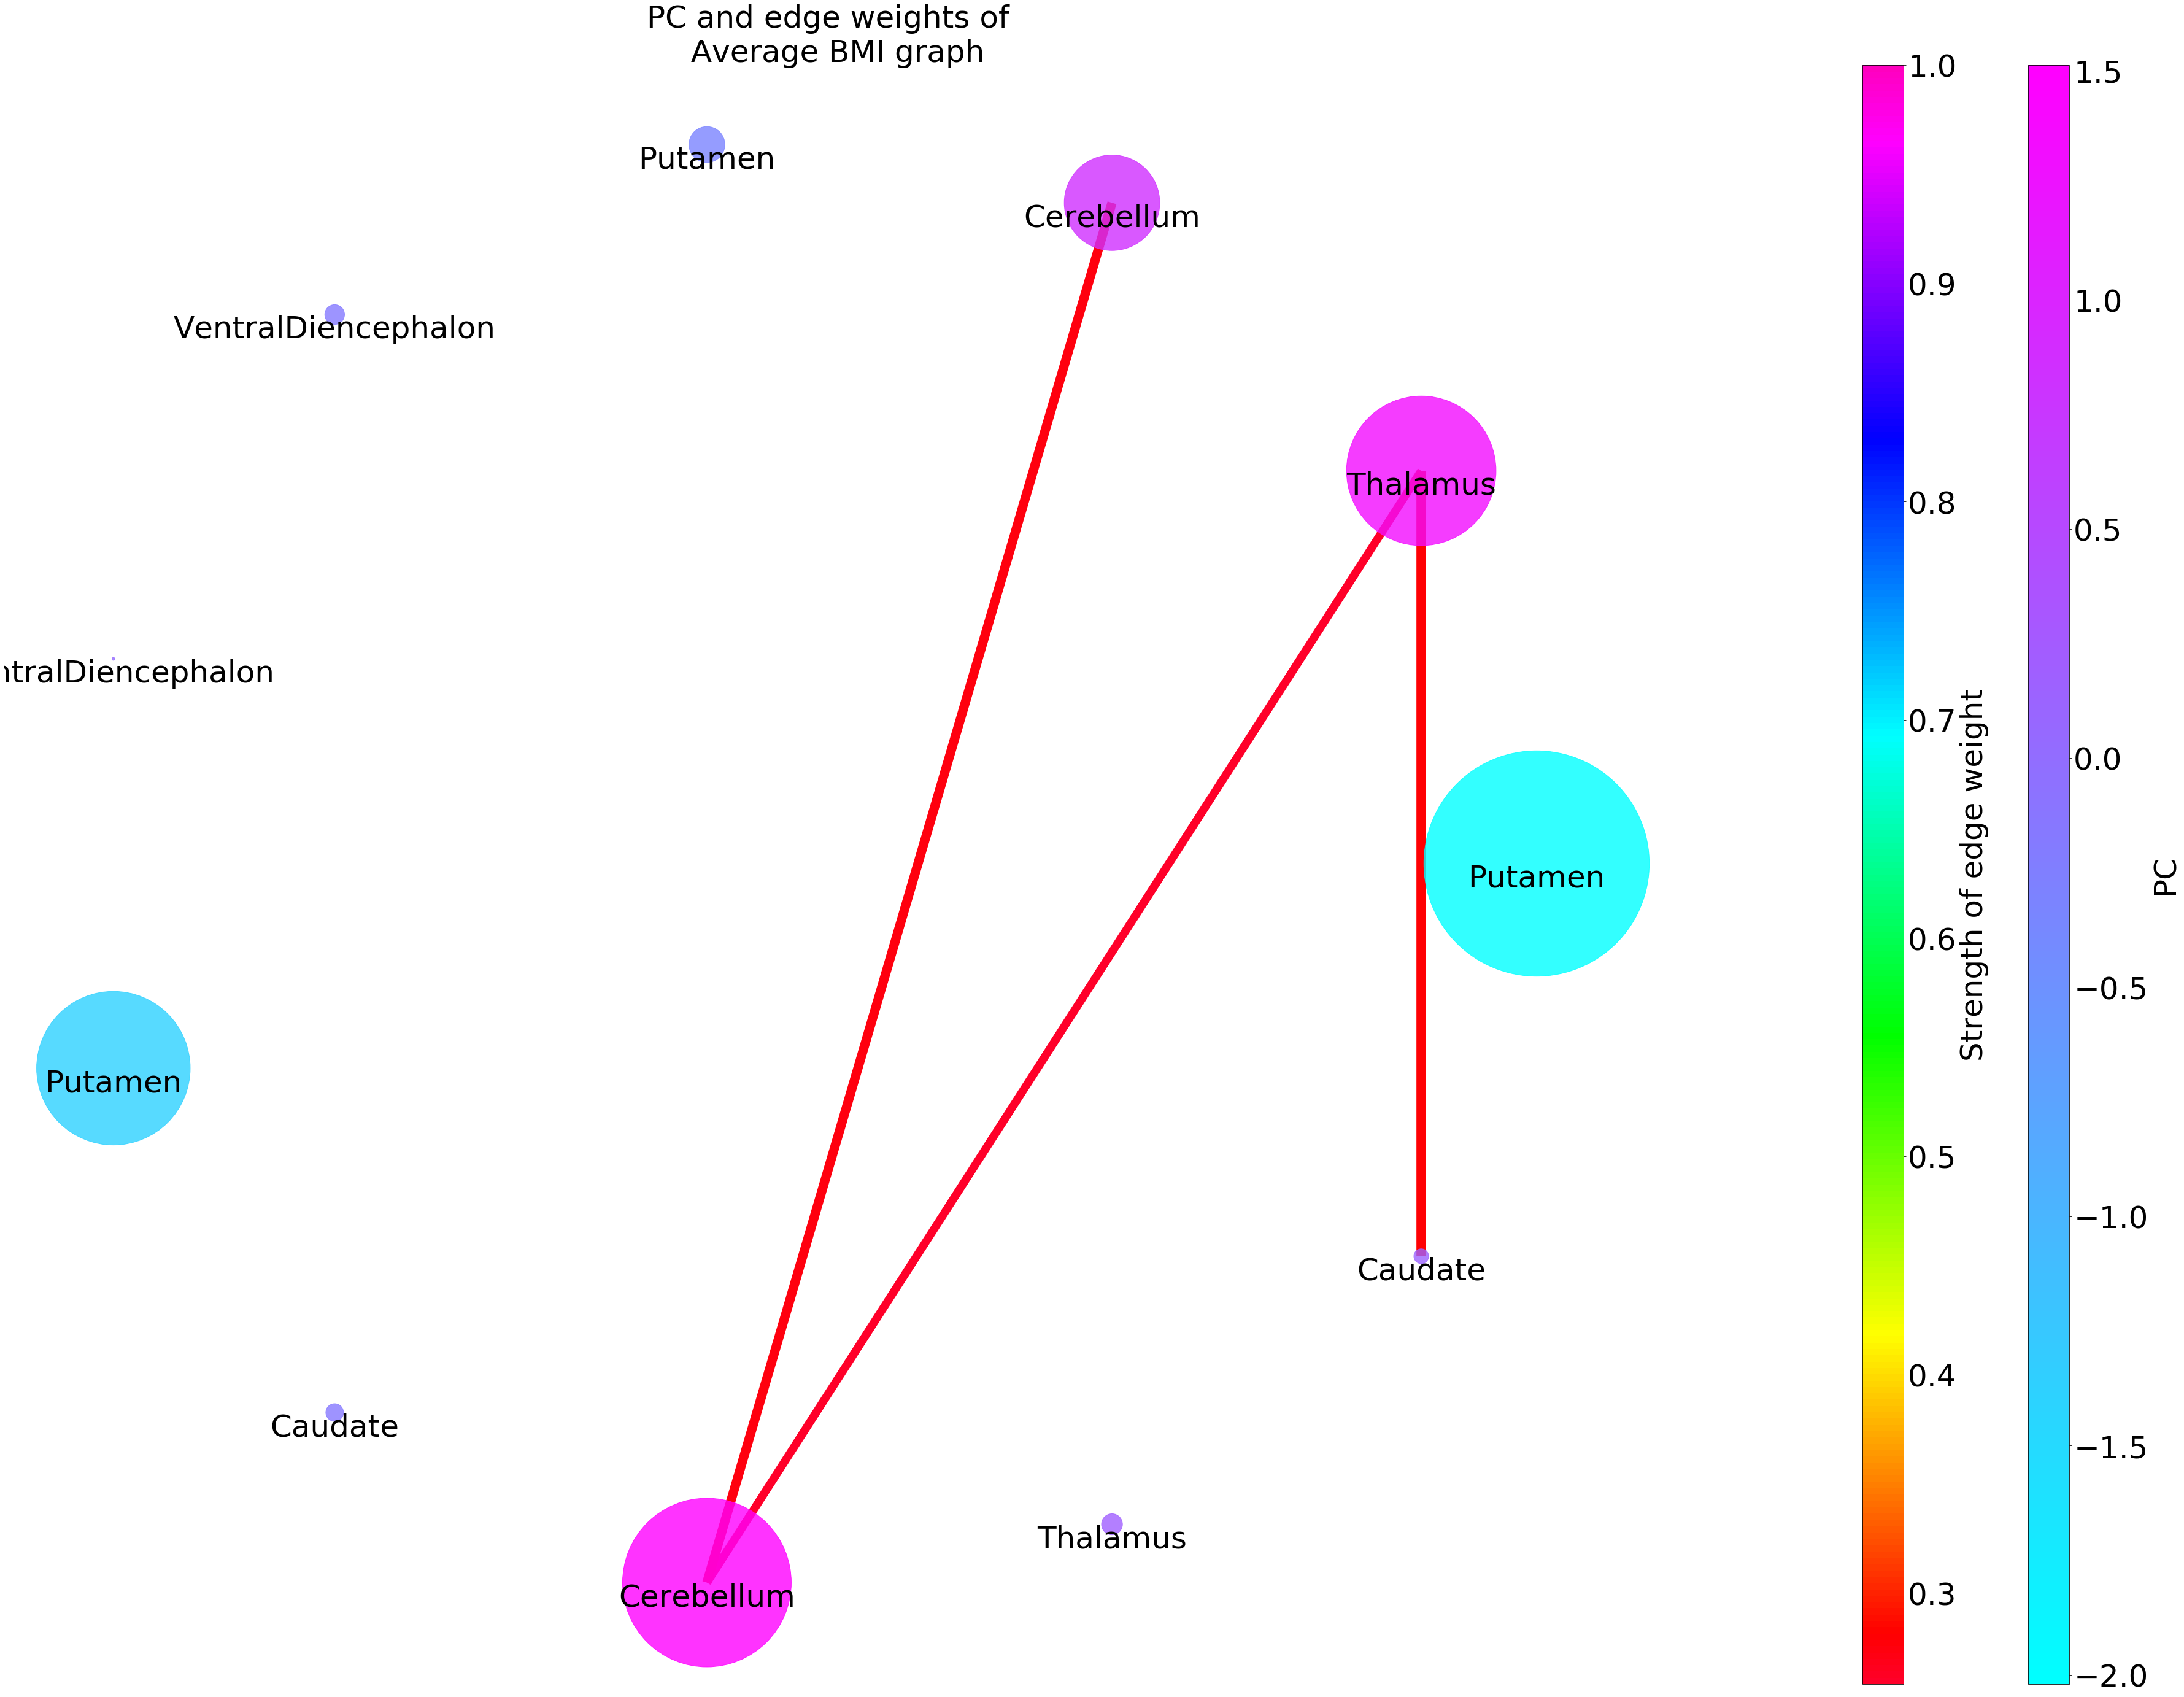

ov
2


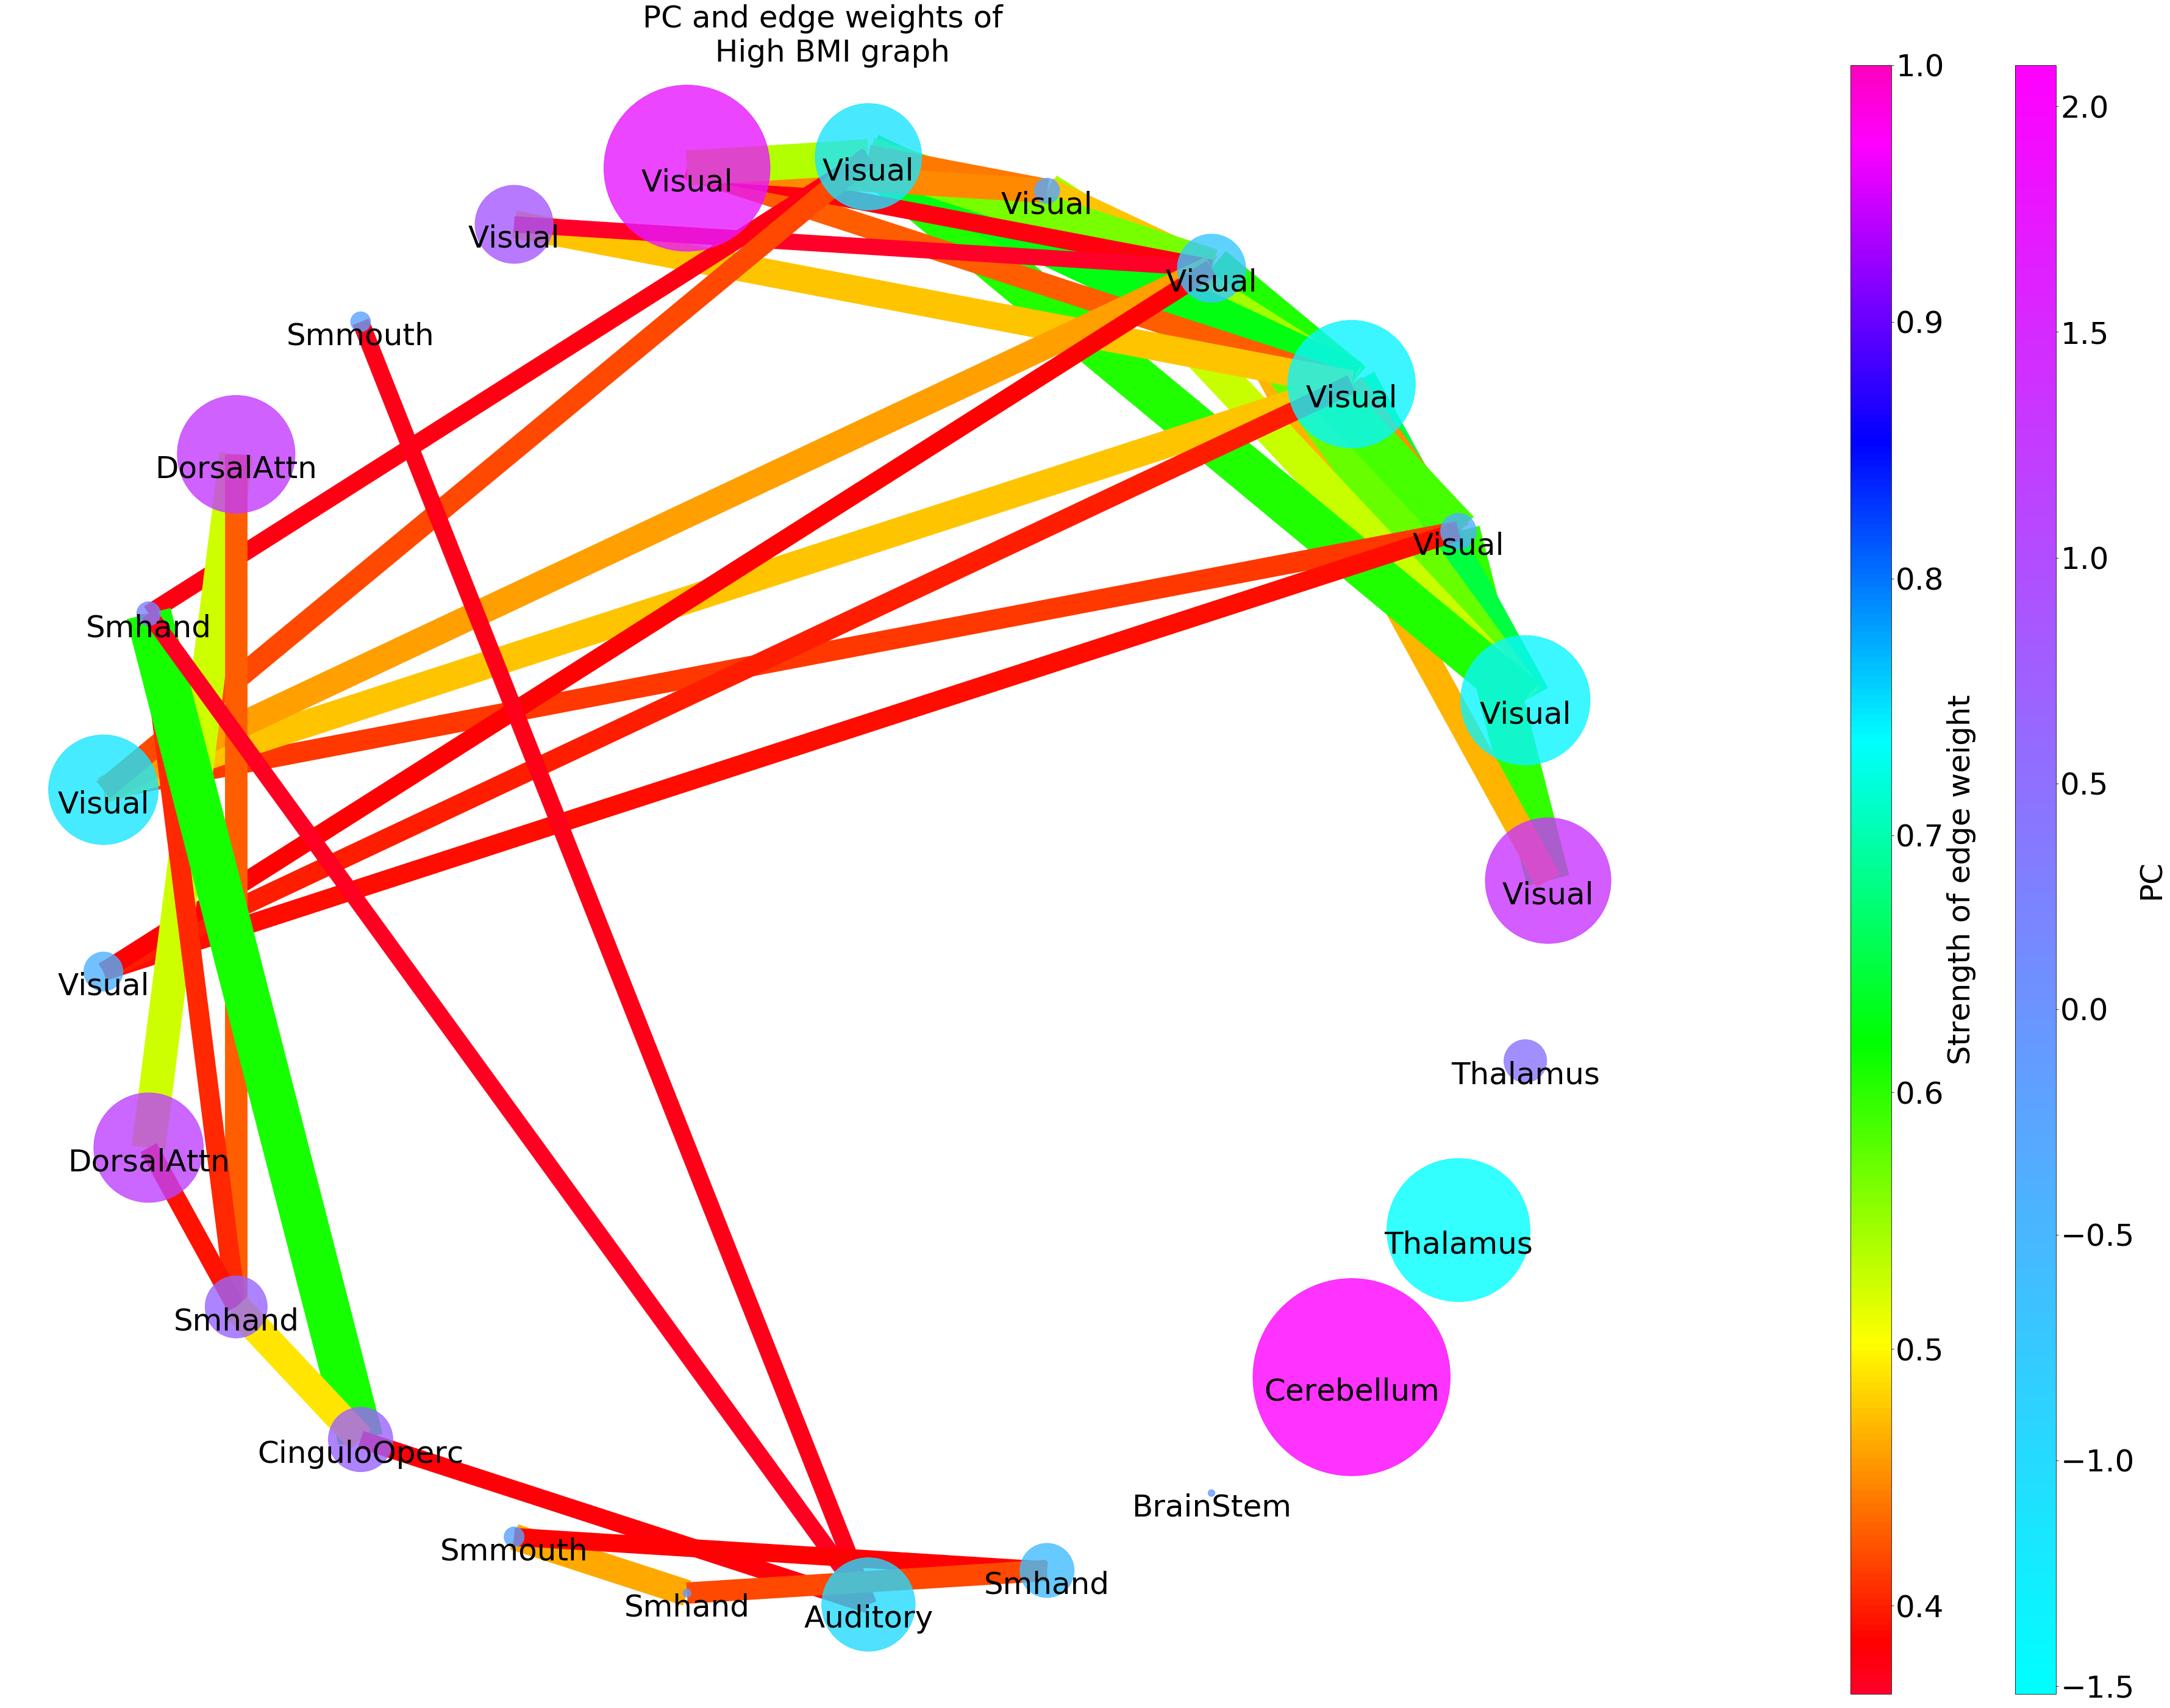

5


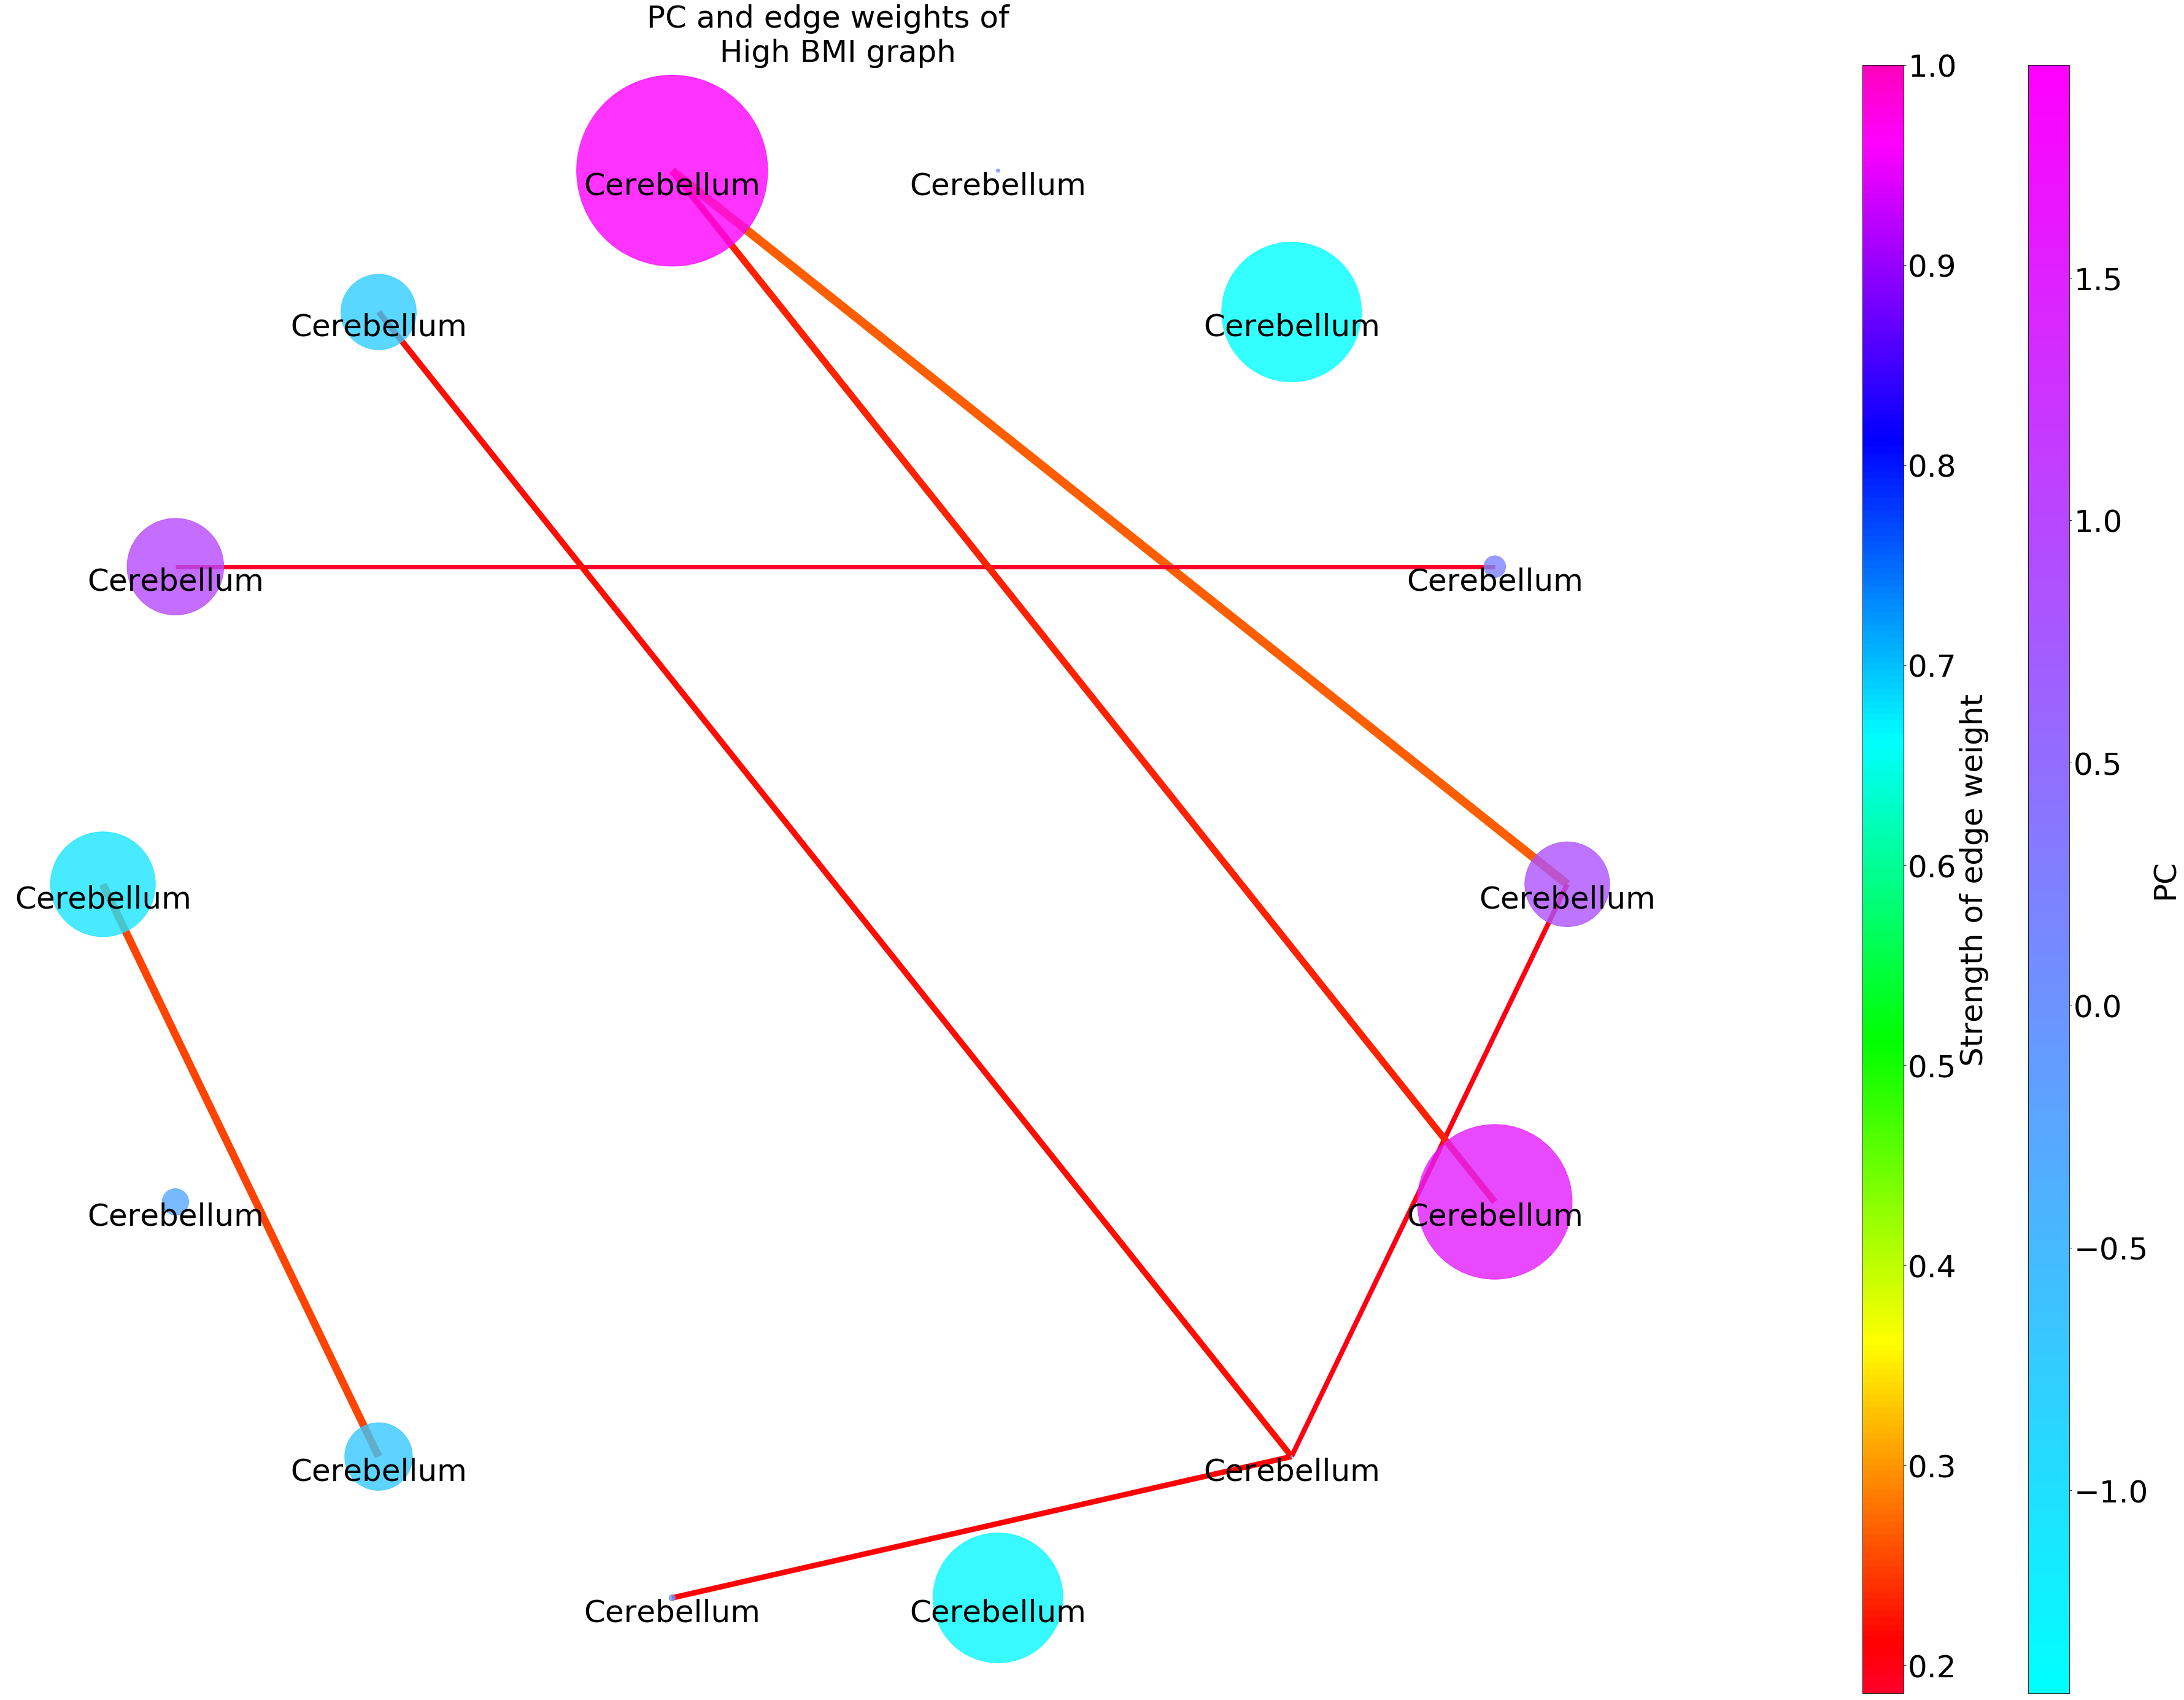

ob
2


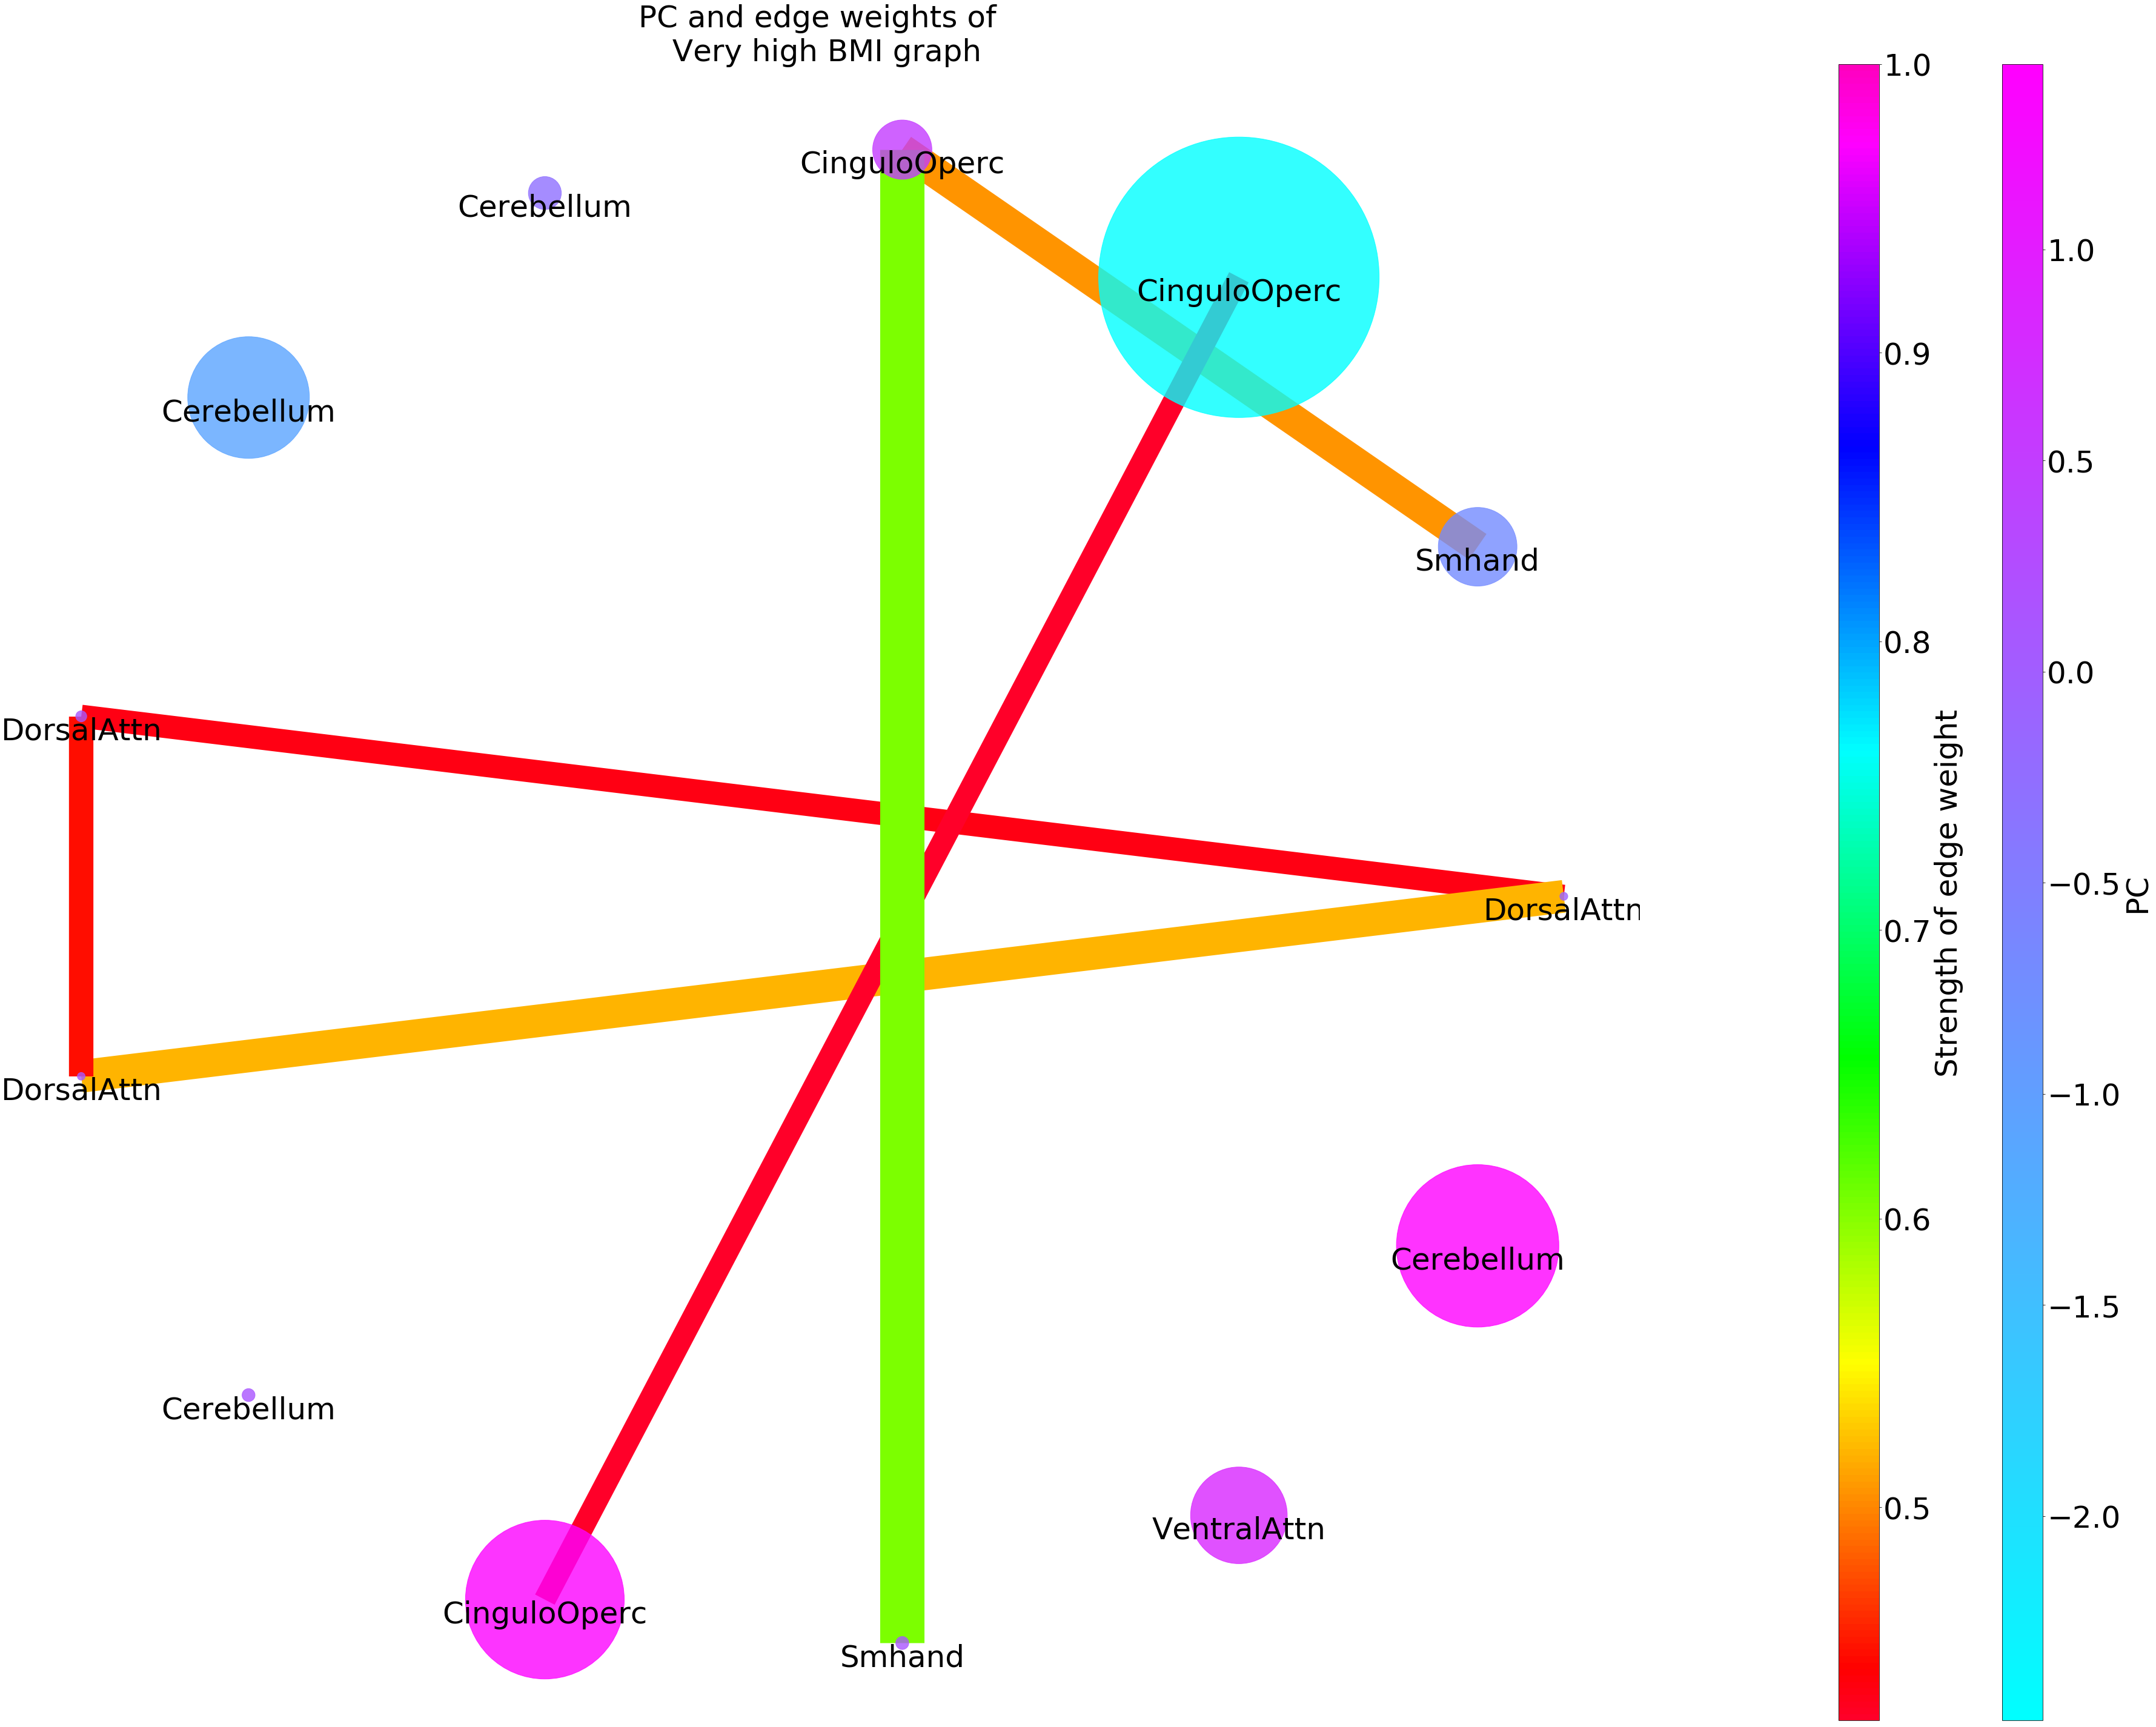

6


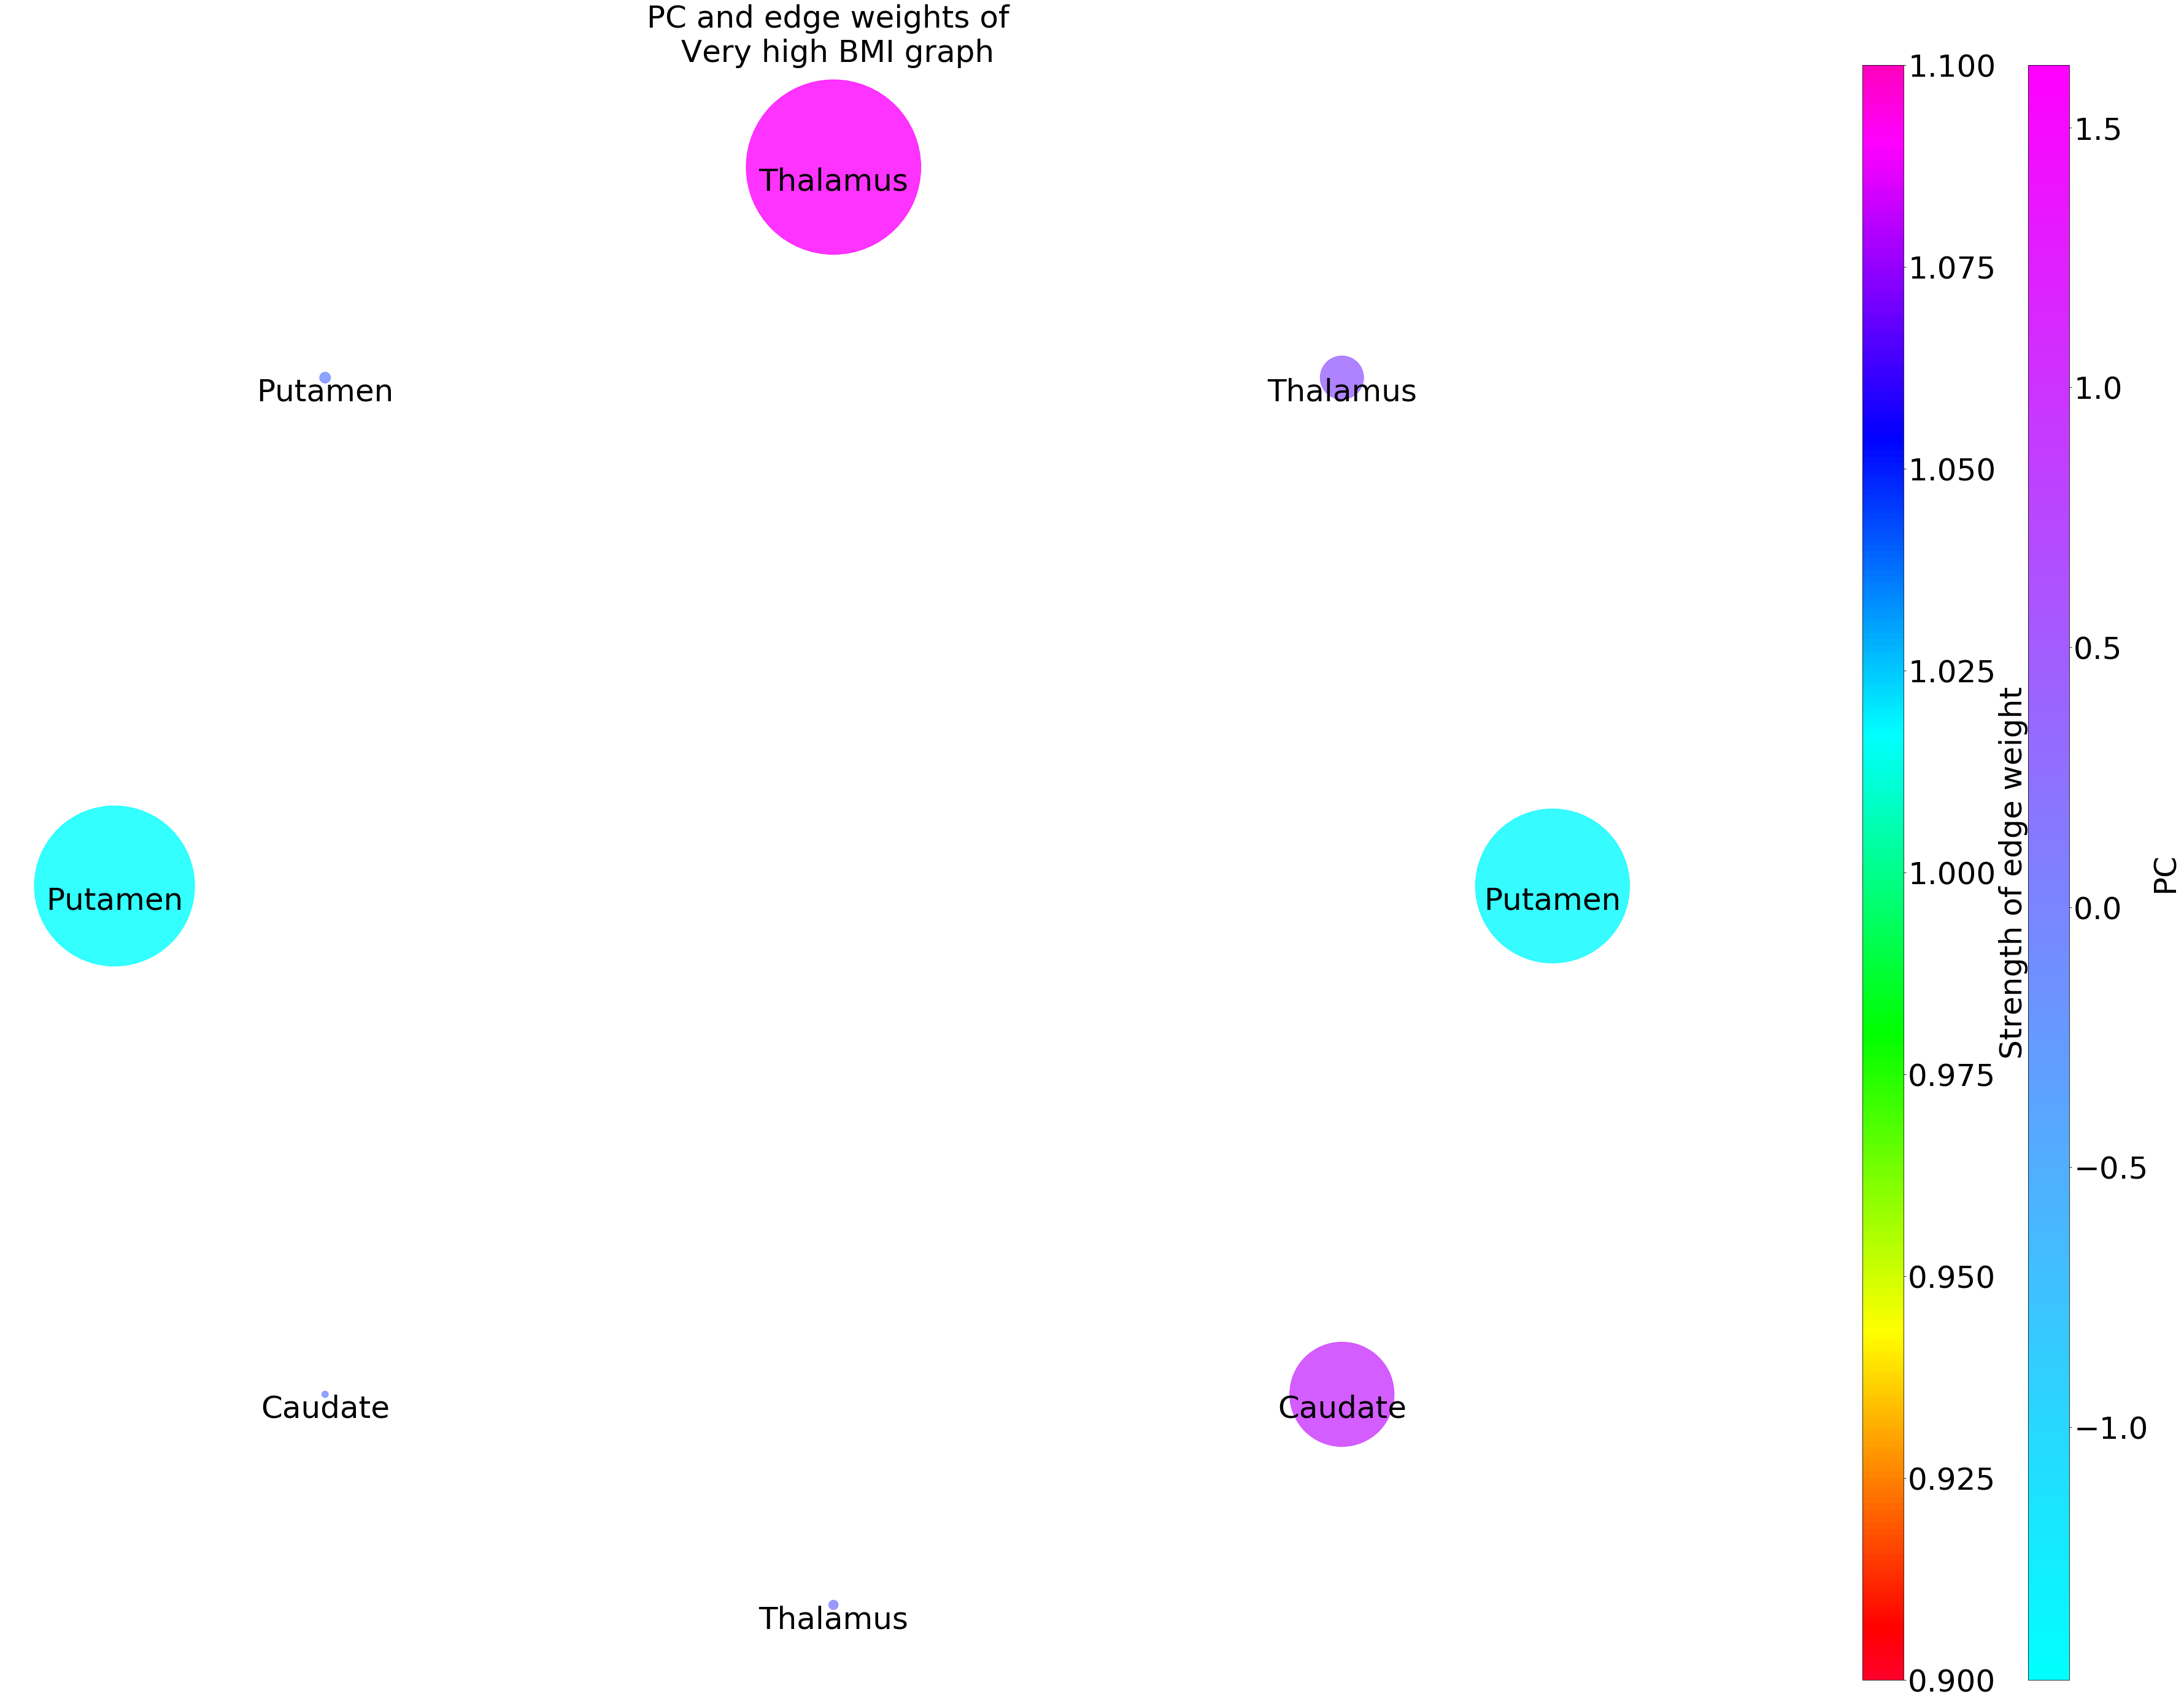

In [92]:
wb_con = {
    'no':{2:{},5:{}},
    'ov': {2:{}, 5:{}},
    'ob':{2:{}, 6:{}}
}

for group, mods in wb_con.items():
    print(group)
    for mod, blank in mods.items():
        print(mod)  
        wb_con[group][mod]=basic_graph(subgraph_dict[group][mod], 50000, 50, 'PC', (75,50), 80, basepath, '%s'%group, '%i'%mod)

## Get the colors for workbench

In [93]:
for group, mods in wb_con.items():
    print(group)
    for mod, data in mods.items():
        print(mod)
        writepath = os.path.join(basepath,'%s_%i.txt'%(group, mod))
        f = open(writepath, "w")
        for key, value in data.items():
            print(key)
            x = value[2]
            print(x)
            f.write('LABEL_%i\n'%(key+1))
            f.write('%i %i %i %i %i\n'%(key+1, x[0], x[1], x[2], x[3]))
        f.close()

no
2
2
[163.  92. 255. 255.]
3
[  4. 251. 255. 255.]
7
[ 47. 208. 255. 255.]
10
[  0. 255. 255. 255.]
12
[ 36. 219. 255. 255.]
15
[ 71. 184. 255. 255.]
16
[ 16. 239. 255. 255.]
17
[255.   0. 255. 255.]
18
[179.  76. 255. 255.]
19
[102. 153. 255. 255.]
20
[ 83. 172. 255. 255.]
22
[112. 143. 255. 255.]
26
[120. 135. 255. 255.]
27
[ 18. 237. 255. 255.]
29
[ 48. 207. 255. 255.]
33
[109. 146. 255. 255.]
34
[108. 147. 255. 255.]
37
[125. 130. 255. 255.]
40
[ 83. 172. 255. 255.]
42
[ 86. 169. 255. 255.]
44
[ 37. 218. 255. 255.]
46
[ 57. 198. 255. 255.]
80
[105. 150. 255. 255.]
87
[191.  64. 255. 255.]
95
[  4. 251. 255. 255.]
96
[131. 124. 255. 255.]
5
64
[  0. 255. 255. 255.]
66
[243.  12. 255. 255.]
67
[208.  47. 255. 255.]
68
[123. 132. 255. 255.]
98
[133. 122. 255. 255.]
99
[148. 107. 255. 255.]
75
[ 46. 209. 255. 255.]
78
[134. 121. 255. 255.]
48
[255.   0. 255. 255.]
86
[160.  95. 255. 255.]
62
[156.  99. 255. 255.]
ov
2
2
[202.  53. 255. 255.]
3
[ 10. 245. 255. 255.]
7
[ 80. 175. 255. 

## Get ICnames

In [94]:
g = subgraph_dict['ob'][6]
new={}
for x,y in nx.get_node_attributes(g, 'labels').items():
        new[x]=[y['IC'], y['area']]